# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.


In the past 30 years, the number of road traffic accidents (RTAs), road traffic injuries (RTIs), and road traffic fatalities (RTFs) continuously increased in KSA <a href="https://reader.elsevier.com/reader/sd/pii/S2352646718300553?token=C1C12D013743AB0ABB0308589D2BABA16B053AB09F43330DAE0C72355A97F0021A8C0F04351309FE99E16EE905D697BB" target="_blank">(Dahim, 2018)</a>. A few years earlier, the numbers decreased. As a Data scientist who explores and analyzes the data sets, what factors increase or decrease the numbers. Your report should include outside research to support your findings and recommendations to the government sectors to maximize the quality of life in KSA. 

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

Some findings appeared by applying detailed data science steps from importing and cleaning data sets to descriptive and inferential statistics. From 1993 to 2017, most regions with the highest driving licenses are Riyadh, Makkah, and Eastern. Moreover, the number of driving licences issued in Makkah is more than the year average. In 2016 and 2017, Makkah has the highest mean traffic accident numbers while Northern Border has the lowest. Even though the remaining regions have the same traffic rules and regulations, Makkah, Riyadh, and the Eastern Region have high mean traffic accidents. At the same time, these regions have more driving licences issued than the year average. There is a correlation between the number of driving licences issued and the number of traffic accidents.


From the plots, Makkah has the highest number of accidents, injured, and dead. In addition to Makkah, Riyadh and Eastern Region have high numbers. In contrast, ten regions out of Saudi Arabia regions have similar numbers. Therefore, plotting shows outliers, which have high numbers of accidents, injuries, and death. In this case, removing the outliers is not appropriate because the outliers need further investigation and research to understand the reasons. The outliers should be identified to avoid any effect on the model's performance to fit a Machine Learning model.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code
# Traffic Accidents Data(traffic data frame)
# Driving Licenses Data(driving data frame)
traffic_ksa = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv', delimiter = ';') # split the columns by delimiter = ';'
driving_ksa = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', delimiter = ';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code
traffic_ksa.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [4]:
driving_ksa.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:

Both data frames have an unnamed column containing the same values as the default index for each row. Removing one of these columns is a solution to avoid the duplicate between the default index and an unnamed column.

For the traffic data frame, the unnamed column is repeated twice. 



In [5]:
traffic=traffic_ksa.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [6]:
driving=driving_ksa.drop(columns=['Unnamed: 0'])

#### 4a. How complete is the data?

Investigate missing values etc.

In [7]:
#Code
traffic.isna().sum() # there are 6 missing values in geo_point_2d for traffic data frame.    

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [8]:
driving.isna().sum() # there are 25 missing values in geo_point_2d for driving data frame.

Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [9]:
# The data type for each column is object while maximum and minimum are applied for numerical values. Therefore, there are no minimum and maximum possible values for each dataset.
print('The maximum possible value: ', traffic.max()) # There is no maximum value in traffic data sets.
print('The minimum possible value: ',traffic.min())
traffic.describe() # Applying describe() to check if maximum and minimum values are calculated.


The maximum possible value:  Series([], dtype: float64)
The minimum possible value:  Series([], dtype: float64)


,Year,Region,Indicator,Value,geo_point_2d
count,84,84,84,84,78
unique,2,14,3,84,13
top,(2017),Qassim,No. of Accidents,16070n,"29.9677445762, 39.5570371172"
freq,42,6,28,1,6


#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
#code
traffic.dtypes

Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [11]:
driving.dtypes

Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

In [12]:
traffic.Year

0     (2016)
1     (2016)
2     (2016)
3     (2016)
4     (2016)
       ...  
79    (2017)
80    (2017)
81    (2017)
82    (2017)
83    (2017)
Name: Year, Length: 84, dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

For both data frames, the data type for the unnamed columns are integer while others columns are object. 

After checking data set schema in the refrences for both data frames, the data types for traffic as following: (time_period, date), (region, text), (indicator, text), (value, integer), (geo_shape, geo shape), and (geo_point_2d, geo point).



#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
#code
# The only numerical column in traffic data frame is Value.
# Removing n from each value to convert the column from object to integer.
traffic.Value= traffic.Value.apply(lambda x: x.replace("n",""))
traffic.Value= traffic.Value.apply(lambda x: int(x))

- Make new columns `x` and `y` using `geo_point_2d`

In [14]:
#code
# new columns x and y using geo_point_2d for traffic data frame.
# convert the type to str to split value
traffic['x']= traffic['geo_point_2d'].apply(lambda x:str(x).split(',')[0]) # Filling new column with numbers before ',' in geo_point_2d for each row.
traffic['y']= traffic['geo_point_2d'].apply(lambda x:str(x).split(',')[-1])# Filling new column with numbers after ',' in geo_point_2d for each row.
traffic.head()

,Year,Region,Indicator,Value,geo_point_2d,x,y
0,(2016),Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,(2016),Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,(2016),Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,(2016),Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,(2016),Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508


In [15]:
#code
# new columns x and y using geo_point_2d for driving data frame.
# convert the type to str to split value
driving['x']= driving['geo_point_2d'].apply(lambda x:str(x).split(',')[0]) # Filling new column with numbers before ',' in geo_point_2d for each row.
driving['y']= driving['geo_point_2d'].apply(lambda x:str(x).split(',')[-1])# Filling new column with numbers after ',' in geo_point_2d for each row.

In [16]:
driving.head()

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334",21.628962766,41.2636898334


In [17]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          84 non-null     object
 1   Region        84 non-null     object
 2   Indicator     84 non-null     object
 3   Value         84 non-null     int64 
 4   geo_point_2d  78 non-null     object
 5   x             84 non-null     object
 6   y             84 non-null     object
dtypes: int64(1), object(6)
memory usage: 4.7+ KB


- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
#code
# traffic data frame.
# convert columns' types as data set schema.
traffic.Year=traffic.Year.apply(lambda x: x.replace("(","").replace(")",'')) # remove "( and )" to convert.
#traffic.Year=traffic.Year.apply(lambda x: x.astypeint(x)) # convert from object to int.
traffic.Year= traffic.Year.apply(lambda x: int(x))
traffic.Region=traffic.Region.astype("string") # convert from object to string.
traffic.Indicator=traffic.Indicator.astype("string") # convert from object to string.

In [19]:
#code
# driving data frame.
# updating the columns' type after see the referance.
driving.Year=driving.Year.apply(lambda x: x.replace("(","").replace(")",'')) # remove "( and )" to convert.
driving.Year=driving.Year.apply(lambda x: int(x)) # convert from object to int.
driving['Administritive Area']=driving['Administritive Area'].astype("string") # convert from object to string.
driving['Driving Liceses']= driving['Driving Liceses'].apply(lambda x: x.replace("n","")) # remove n to convert.
driving['Driving Liceses']= driving['Driving Liceses'].apply(lambda x: int(x)) # convert from object to integer. 


- Display the data types again to confirm they are correct.

In [20]:
#Code:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          84 non-null     int64 
 1   Region        84 non-null     string
 2   Indicator     84 non-null     string
 3   Value         84 non-null     int64 
 4   geo_point_2d  78 non-null     object
 5   x             84 non-null     object
 6   y             84 non-null     object
dtypes: int64(2), object(3), string(2)
memory usage: 4.7+ KB


In [21]:
driving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 350 non-null    int64 
 1   Administritive Area  350 non-null    string
 2   Driving Liceses      350 non-null    int64 
 3   geo_point_2d         325 non-null    object
 4   x                    350 non-null    object
 5   y                    350 non-null    object
dtypes: int64(2), object(3), string(1)
memory usage: 16.5+ KB


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [22]:
#code
# change each column name for both data frame. Each column ends with _t means that it is column from traffic data frame while _d from driving data frame. 
traffic.rename(columns={ 'Year': 'year_t', 'Region': 'region_t', 'Indicator': 'indicator_t','Value':'liceses_t','geo_point_2d':'geo_point_t','x':'x_t', 'y':'y_t'}, inplace=True)
driving.rename(columns={ 'Year': 'year_d', 'Administritive Area': 'region_d','Driving Liceses':'liceses_d','geo_point_2d':'geo_point_d','x':'x_d', 'y':'y_d'}, inplace=True)


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**


|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|Driving_Licenses/Traffic_Accidents|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|*integer*|Driving_Licenses/Traffic_Accidents|The year of an accident.| 
|**region**|*string*|Driving_Licenses/Traffic_Accidents|The region of an accident occurred (units are Najran, Makkah, Tabouk, Al-Jouf, Hail, Asir, Al-Baaha, Eastern Region, Jazan, Riyadh, Madinah, Qassim, and Northern Boarder).|
|**indicator**|*string*|Traffic_Accidents| The indication of casualty (units are Dead, Accidents, and Injured).|
|**geo_point**|*object*|Driving_Licenses/Traffic_Accidents| geo_point expressed as an object, with lat and lon keys.|
|**x**|*object*|Driving_Licenses/Traffic_Accidents| x expressed as an object, with lat keys.|
|**y**|*object*|Driving_Licenses/Traffic_Accidents| y expressed as an object, with lat and lon keys.|
|**liceses**|*integer*|Driving_Licenses| The driver licese number.|


#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [23]:
#code
#0. Which rows are not associated with regions?
# After viewing and checking region column, there is a value called Total which is not a region of Saudi Arabia.  
traffic.region_t.value_counts() 

#1. Confirm the numbers of all regions add up to total.
total_v= traffic.groupby('region_t')['year_t'].count() # groupby by region with any coulmn to get the total number of data points in each region. 

for i in total_v: # to check if the total number of data points in each region equal to the total value.   
    if i != len(traffic[traffic.region_t == 'Total']):
        print(i, 'is not equal to'+ len(traffic[traffic.region_t == 'Total']))
    else:
        pass # if the total number of data points in a region equal to the total value, pass.
    
#2. Remove the rows that are not associated with regions
#Finding the rows that are associated Total.
i = traffic[(traffic.region_t == 'Total')].index  # returns the index of rows associated with Total.
traffic=traffic.drop(i)  # Remove the rows that are not associated with regions


In [24]:
traffic.region_t.value_counts() # to check 

Tabouk              6
Hail                6
Asir                6
Northern Boarder    6
Al-Jouf             6
Al-Baaha            6
Eastern Region      6
Najran              6
Riyadh              6
Jazan               6
Makkah              6
Madinah             6
Qassim              6
Name: region_t, dtype: Int64

In [25]:
#code
#0. Which rows are not associated with regions?
# After viewing and checking region column, there is a value called Total which is not a region of Saudi Arabia.  
driving.region_d.value_counts() 

#1. Confirm the numbers of all regions add up to total.
total_v= driving.groupby('region_d')['year_d'].count() # groupby by region with any coulmn to get the total number of data points in each region. 

for i in total_v: # to check if the total number of data points in each region equal to the total value.   
    if i != len(driving[driving.region_d == 'Total']):
        print(i, 'is not equal to'+ len(driving[driving.region_d == 'Total']))
    else:
        pass # if the total number of data points in a region equal to the total value, pass.
    
#2. Remove the rows that are not associated with regions
#Finding the rows that are associated Total.
i = driving[(driving.region_d == 'Total')].index  # returns the index of rows associated with Total.
driving=driving.drop(i)  # Remove the rows that are not associated with regions



In [26]:
driving.region_d.value_counts() # to check 

Assir               25
Al-Baha             25
Northern Boarder    25
Najran              25
Al-Jouf             25
Hail                25
Tabouk              25
Jazan               25
Riyadh              25
Al-Qaseem           25
Eastern             25
Madinah             25
Makkah              25
Name: region_d, dtype: Int64

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

Accident data in long format because it has 'indicator_t' and it's value in separated columns. In addition, there are two (identification) columns which are year_t and region_t.

License data in wide format because the observations are represented as rows. Moreover, for every "variable" there is a column that has its own unique values. 

In [27]:
#code
print('Accident data:')
# Accident data in long format because it has 'indicator_t' and it's value in separated columns. In addition, there are two (identification) columns which are year_t and region_t      
traffic_long= traffic.copy() # new data frame has a copy of traffic data frame 
print('Long format shape before converting: ',traffic_long.shape) # check the shape
traffic_long.columns # check columns name

# try to change the format to wide to check.
traffic_wide = pd.pivot_table(traffic_long, columns=['indicator_t'], values='liceses_t', index=['year_t','region_t', 'geo_point_t', 'x_t', 'y_t'])
print('Wide format shape after converting: ',traffic_wide.shape) # check the shape after converting  

#---------------

print('License data:')
# License data in wide format because the observations are represented as rows. Moreover, for every "variable" there is a column that has its own unique values.   
print('Wide format shape before converting: ',driving.shape) # check the shape
traffic_long.columns # check columns name
# try to change the format to long to check
print('Long format shape after converting: ',driving.melt().shape) # check the shape after converting  



Accident data:
Long format shape before converting:  (78, 7)
Wide format shape after converting:  (26, 3)
License data:
Wide format shape before converting:  (325, 6)
Long format shape after converting:  (1950, 2)


#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [28]:
#code
# Accident data was in long format and I have converted to wide in the previous question. 
traffic_wide.head()
#traffic_wide.region_t.value_counts()

indicator_t                                                                      No. of Accidents  \
year_t region_t       geo_point_t                  x_t           y_t                                
2016   Al-Baaha       20.1484058503, 41.4665484892 20.1484058503  41.4665484892              3618   
       Al-Jouf        29.9677445762, 39.5570371172 29.9677445762  39.5570371172             10212   
       Asir           19.1387847401, 42.941470036  19.1387847401  42.941470036              32684   
       Eastern Region 23.2883307307, 50.1478302439 23.2883307307  50.1478302439            101619   
       Hail           27.400845724, 41.4406960508  27.400845724   41.4406960508             10199   

indicator_t                                                                      No. of Casualties - Dead  \
year_t region_t       geo_point_t                  x_t           y_t                                        
2016   Al-Baaha       20.1484058503, 41.4665484892 20.1484058503  41.4665484892                       185   
       Al-Jouf        29.9677445762, 39.5570371172 29.9677445762  39.5570371172                       245   
       Asir           19.1387847401, 42.941470036  19.1387847401  42.941470036                        983   
       Eastern Region 23.2883307307, 50.1478302439 23.2883307307  50.1478302439                      1113   
       Hail           27.400845724, 41.4406960508  27.400845724   41.4406960508                       299   

indicator_t                                                                      No. of Casualties - Injured  
year_t region_t       geo_point_t                  x_t           y_t                                          
2016   Al-Baaha       20.1484058503, 41.4665484892 20.1484058503  41.4665484892                         1227  
       Al-Jouf        29.9677445762, 39.5570371172 29.9677445762  39.5570371172                          920  
       Asir           19.1387847401, 42.941470036  19.1387847401  42.941470036                          2541  
       Eastern Region 23.2883307307, 50.1478302439 23.2883307307  50.1478302439                         4893  
       Hail           27.400845724, 41.4406960508  27.400845724   41.4406960508                          932

In [29]:
#code
print('Column names: ',traffic_wide.columns) # to check column names 
traffic_wide_flat = traffic_wide.reset_index()  # reset index 
print('\nColumn names after resetting index : ',traffic_wide_flat.columns )# to check columns after resetting index.
traffic_wide_flat.head() # check head and notice that indicator_t is the columns name.

Column names:  Index(['No. of Accidents', 'No. of Casualties - Dead',
       'No. of Casualties - Injured'],
      dtype='object', name='indicator_t')

Column names after resetting index :  Index(['year_t', 'region_t', 'geo_point_t', 'x_t', 'y_t', 'No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured'],
      dtype='object', name='indicator_t')


indicator_t,year_t,region_t,geo_point_t,x_t,y_t,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baaha,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892,3618,185,1227
1,2016,Al-Jouf,"29.9677445762, 39.5570371172",29.9677445762,39.5570371172,10212,245,920
2,2016,Asir,"19.1387847401, 42.941470036",19.1387847401,42.941470036,32684,983,2541
3,2016,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,101619,1113,4893
4,2016,Hail,"27.400845724, 41.4406960508",27.400845724,41.4406960508,10199,299,932


In [30]:
#Code: 
print('\nColumn name: ', traffic_wide_flat.columns.name) # to check columns name
traffic_wide_flat.columns.name = None # remove indicator_t 
traffic_wide_flat.head() # to check 


Column name:  indicator_t


,year_t,region_t,geo_point_t,x_t,y_t,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baaha,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892,3618,185,1227
1,2016,Al-Jouf,"29.9677445762, 39.5570371172",29.9677445762,39.5570371172,10212,245,920
2,2016,Asir,"19.1387847401, 42.941470036",19.1387847401,42.941470036,32684,983,2541
3,2016,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,101619,1113,4893
4,2016,Hail,"27.400845724, 41.4406960508",27.400845724,41.4406960508,10199,299,932


In [31]:
# Both dataframes in wide format and ready for merging. 

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [32]:
#code
traffic_wide_flat.head()

,year_t,region_t,geo_point_t,x_t,y_t,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baaha,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892,3618,185,1227
1,2016,Al-Jouf,"29.9677445762, 39.5570371172",29.9677445762,39.5570371172,10212,245,920
2,2016,Asir,"19.1387847401, 42.941470036",19.1387847401,42.941470036,32684,983,2541
3,2016,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,101619,1113,4893
4,2016,Hail,"27.400845724, 41.4406960508",27.400845724,41.4406960508,10199,299,932


In [33]:
driving.head()

,year_d,region_d,liceses_d,geo_point_d,x_d,y_d
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334


In [34]:
driving.region_d.value_counts()

Assir               25
Al-Baha             25
Northern Boarder    25
Najran              25
Al-Jouf             25
Hail                25
Tabouk              25
Jazan               25
Riyadh              25
Al-Qaseem           25
Eastern             25
Madinah             25
Makkah              25
Name: region_d, dtype: Int64

In [35]:
traffic.region_t.value_counts()
traffic_wide_flat.region_t.value_counts()

Makkah              2
Qassim              2
Madinah             2
Riyadh              2
Jazan               2
Eastern Region      2
Al-Baaha            2
Al-Jouf             2
Najran              2
Northern Boarder    2
Asir                2
Hail                2
Tabouk              2
Name: region_t, dtype: int64

In [36]:
# Change some regions in driving dataframe to math traffic_wide_flat dataframe. Therefore, merging both dataframes be possible 
driving.region_d.replace(['Al-Qaseem', 'Eastern', 'Al-Baha', 'Assir'], ['Qassim', 'Eastern Region', 'Al-Baaha','Asir'], inplace=True)

In [37]:
driving.region_d.value_counts() # check driving dataframe after replacing some regions.


Makkah              25
Madinah             25
Qassim              25
Riyadh              25
Jazan               25
Eastern Region      25
Al-Baaha            25
Al-Jouf             25
Najran              25
Northern Boarder    25
Asir                25
Hail                25
Tabouk              25
Name: region_d, dtype: int64

In [38]:
# change each column name for both data frame, so the identical columns have the same name to merge both dataframes.  
driving_updated= driving.copy() # copy of driving dataframe. 
traffic_wide_flat.rename(columns={ 'year_t': 'year', 'region_t': 'region', 'geo_point_t':'geo_point','x_t':'x', 'y_t':'y','No. of Accidents':'accidents',
                                  'No. of Casualties - Dead':'casualties_dead', 'No. of Casualties - Injured':'casualties_injured'}, inplace=True) # rename columns name
driving_updated.rename(columns={ 'year_d': 'year', 'region_d': 'region','geo_point_d':'geo_point','x_d':'x', 'y_d':'y'}, inplace=True) # reneame columns name


In [39]:
# merge both dataframe based on 'year' and 'region' as intersection of keys from both dataframes. The suitable type of merge is inner because of intersection of keys. 
merge_df= pd.merge(traffic_wide_flat, driving_updated, how='inner', on=['year', 'region'], suffixes=('', '_y')).drop(['geo_point_y','x_y','y_y'], axis=1) # columns from right dataframe ends with '_y'
# drop diplicated columns.

merge_df.head() # to check.



,year,region,geo_point,x,y,accidents,casualties_dead,casualties_injured,liceses_d
0,2016,Al-Baaha,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892,3618,185,1227,4614
1,2016,Al-Jouf,"29.9677445762, 39.5570371172",29.9677445762,39.5570371172,10212,245,920,9371
2,2016,Asir,"19.1387847401, 42.941470036",19.1387847401,42.941470036,32684,983,2541,41367
3,2016,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,101619,1113,4893,142307
4,2016,Hail,"27.400845724, 41.4406960508",27.400845724,41.4406960508,10199,299,932,54507


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [40]:
#code
merge_df.to_csv('../data/combined_datasets.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [41]:
#code
merge_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,26.0,2016.500000,0.509902,2016.0,2016.00,2016.5,2017.00,2017.0
accidents,26.0,38225.692308,46493.705035,1414.0,10276.25,16050.5,30981.25,145541.0
casualties_dead,26.0,635.384615,549.783381,112.0,241.25,415.5,929.25,2243.0
casualties_injured,26.0,2743.038462,2922.641127,374.0,923.00,1618.5,3784.00,12383.0
liceses_d,26.0,62507.000000,107293.917762,2153.0,8363.25,16085.0,51222.00,495307.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [42]:
#code
import math # to calculate sqrt
def standard_deviation(col):
    n= len(col) # to get n
    mean= sum(col)/n # to get mean
    sd=math.sqrt(sum((x- mean) ** 2 for x in col)/n) # Calculate standard deviation 
    return sd

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [43]:
#Code: 
st_d={} # empty dictionary.
c= merge_df.select_dtypes(include=[np.number]) # select numeric columns

[st_d.update({i:standard_deviation(merge_df[i])}) for i in c] # filling dictionary with column name and standard deviation 

st_d # to check

{'year': 0.5,
 'accidents': 45590.82869880505,
 'casualties_dead': 539.1069593406002,
 'casualties_injured': 2865.885411322023,
 'liceses_d': 105210.34237659337}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [44]:
merge_df.head()

,year,region,geo_point,x,y,accidents,casualties_dead,casualties_injured,liceses_d
0,2016,Al-Baaha,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892,3618,185,1227,4614
1,2016,Al-Jouf,"29.9677445762, 39.5570371172",29.9677445762,39.5570371172,10212,245,920,9371
2,2016,Asir,"19.1387847401, 42.941470036",19.1387847401,42.941470036,32684,983,2541,41367
3,2016,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,101619,1113,4893,142307
4,2016,Hail,"27.400845724, 41.4406960508",27.400845724,41.4406960508,10199,299,932,54507


In [45]:
print('Numpy std method:\n')
print('No. of Accidents: ',np.std(merge_df['accidents']))
print('No. of Casualties - Dead: ',np.std(merge_df['casualties_dead']))
print('No. of Casualties - Injured: ',np.std(merge_df['casualties_injured']))
print('liceses_d: ',np.std(merge_df['liceses_d']))

merge_df.drop('year', axis=1).describe()

Numpy std method:

No. of Accidents:  45590.82869880505
No. of Casualties - Dead:  539.1069593406002
No. of Casualties - Injured:  2865.885411322023
liceses_d:  105210.34237659337


,accidents,casualties_dead,casualties_injured,liceses_d
count,26.000000,26.000000,26.000000,26.000000
mean,38225.692308,635.384615,2743.038462,62507.000000
std,46493.705035,549.783381,2922.641127,107293.917762
min,1414.000000,112.000000,374.000000,2153.000000
25%,10276.250000,241.250000,923.000000,8363.250000
50%,16050.500000,415.500000,1618.500000,16085.000000
75%,30981.250000,929.250000,3784.000000,51222.000000
max,145541.000000,2243.000000,12383.000000,495307.000000


In [46]:
merge_df.head()

,year,region,geo_point,x,y,accidents,casualties_dead,casualties_injured,liceses_d
0,2016,Al-Baaha,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892,3618,185,1227,4614
1,2016,Al-Jouf,"29.9677445762, 39.5570371172",29.9677445762,39.5570371172,10212,245,920,9371
2,2016,Asir,"19.1387847401, 42.941470036",19.1387847401,42.941470036,32684,983,2541,41367
3,2016,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,101619,1113,4893,142307
4,2016,Hail,"27.400845724, 41.4406960508",27.400845724,41.4406960508,10199,299,932,54507


Answer: 

Manually calculated standard deviations match up with output from numpy's std method. However, the manually calculated standard deviations did not match up with the output from pandas describe. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [47]:
# Q1: Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)

h_l_dr=driving_updated.sort_values(by=['year','liceses_d'], # sort year from 1993 to 2017 and liceses_d from the highest to lowest.  
        ascending=[True,False])  # first row is the highest driving licenses while the lowest is last row for each year.    

h_l_dr.to_csv('../data/EDA/sub_question_1/highest_lowest_driving_licenses.csv') # to save file as csv.
h_l_dr.head() # to check

,year,region,liceses_d,geo_point,x,y
152,1993,Riyadh,103886,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766
325,1993,Qassim,73618,"26.1967063704, 43.3429998455",26.1967063704,43.3429998455
186,1993,Makkah,65977,"21.628962766, 41.2636898334",21.628962766,41.2636898334
216,1993,Hail,10484,"27.400845724, 41.4406960508",27.400845724,41.4406960508
332,1993,Eastern Region,9964,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439


In [48]:
# Q1: Continue:
# Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017).

highest={} # dict for filling eith the regions that have the highest Driving Licenses based on years.
lowest={} # # dict for filling eith the regions that have the lowest Driving Licenses based on years. 
h_idx=0  # index for the highest driving licenses in h_l_dr dataframe.
l_idx=12 # index for the lowest driving licenses in h_l_dr dataframe.

years= sorted(driving_updated.year.unique()) # 13 the total number of regions = len(years).

for i in years: # for each year filling the highest and lowest driving licenses
    highest[i]=[h_l_dr.region.iloc[h_idx]]
    lowest[i]= [h_l_dr.region.iloc[l_idx]]
    # update the index to get the next year in the loop.
    # ex: 1993:
    # h_idx=0, l_idx=12, the first 13th rows are regions in 1993.
    # ex:1994:
    # h_idx=l_idx+1=13, l_idx=l_idx+13= 25, from the 13th row, after last row of 1993, the regions in 1994.
    # so on until the last row in h_l_dr.
    h_idx= l_idx+1  # update index 
    l_idx= l_idx+13 # update index 

highest_df= pd.DataFrame.from_dict(highest) # save it as dataframe.
highest_df= highest_df.melt() # convert from wide to long.
highest_df.to_csv('../data/EDA/sub_question_1/highest_driving_licenses_years.csv') # save to csv file
highest_df.head() # to check


,variable,value
0,1993,Riyadh
1,1994,Riyadh
2,1995,Riyadh
3,1996,Riyadh
4,1997,Riyadh


In [49]:
highest_df.value.value_counts() # to get count for each region.

Riyadh            10
Makkah             9
Eastern Region     6
Name: value, dtype: int64

In [50]:
# Q1: Continue:
# Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017).

lowest_df= pd.DataFrame.from_dict(lowest) # save it as dataframe.
lowest_df= lowest_df.melt() # convert from wide to long.
lowest_df.to_csv('../data/EDA/sub_question_1/lowest_driving_licenses_years.csv') # save to csv file
lowest_df.head() # to check

,variable,value
0,1993,Northern Boarder
1,1994,Northern Boarder
2,1995,Northern Boarder
3,1996,Northern Boarder
4,1997,Northern Boarder


In [51]:
lowest_df.value.value_counts() # to get count for each region.

Northern Boarder    21
Al-Baaha             2
Najran               1
Tabouk               1
Name: value, dtype: int64

In [52]:
lowest_df.head()

,variable,value
0,1993,Northern Boarder
1,1994,Northern Boarder
2,1995,Northern Boarder
3,1996,Northern Boarder
4,1997,Northern Boarder


In [53]:
# Q1: Continue:
# Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017).
# Another way: without saving just print using .head and sort.
driving_updated.sort_values(by=['year','liceses_d'], # sort year from 1993 to 2017 and liceses_d from the highest to lowest.  
        ascending=[True,False]).head()

,year,region,liceses_d,geo_point,x,y
152,1993,Riyadh,103886,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766
325,1993,Qassim,73618,"26.1967063704, 43.3429998455",26.1967063704,43.3429998455
186,1993,Makkah,65977,"21.628962766, 41.2636898334",21.628962766,41.2636898334
216,1993,Hail,10484,"27.400845724, 41.4406960508",27.400845724,41.4406960508
332,1993,Eastern Region,9964,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439


**Comment and findings:**

The analysis results are impressive because there are only three regions with the highest driving licenses from 1993 - 2017). In contrast, three areas with the lowest driving licenses in the same period.

From 1993 to 2017, most regions with the highest driving licenses are Riyadh, Makkah, and Eastern, respectively. On the other hand, Northern Border is almost the lowest driving licenses from 1993 to 2014 while Tabouk, Najran, and Al-Baaha in 2015,  2016, and 2017, respectively, are regions with the lowest driving licenses.


Some questions arise while performing EDA:

- Is the population density higher in Riyadh, Makkah, and Eastern Region than the other regions?
- Is the main transportation in the highest regions required a driving license? 
- Do people issue driving licenses in all Saudi Arabia regions or some people drive without driving licenses?
- What happened in the last three years (2015, 2016, 2017) cause that Tabouk, Najran, and Al-Baaha, respectively, be the regions with the lowest driving licenses instead of Northern Border?

In the research section, some of these questions are addressed and discussed further. 
   

In [54]:
# Q2: Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)

h_l_mean_T = traffic_wide_flat.groupby('region').agg({'accidents': 'mean'})
h_l_mean_T= h_l_mean_T.sort_values(by=['accidents'],ascending=[False]) # sort from the highest.

h_l_mean_T.to_csv('../data/EDA/sub_question_2/highest_lowest_mean_accidents.csv') # save to csv file
h_l_mean_T.head() # to check regions have the highest mean Traffic Accidents numbers

,accidents
region,
Makkah,140189.5
Riyadh,120830.5
Eastern Region,91526.0
Asir,28964.5
Qassim,24034.5


In [55]:
h_l_mean_T.tail() # to check regions have the lowest mean Traffic Accidents numbers

,accidents
region,
Northern Boarder,12368.0
Al-Jouf,10340.5
Hail,9789.0
Najran,3214.0
Al-Baaha,2516.0


**Comment and findings:**

In 2016 and 2017, Makkah has the highest mean traffic accident numbers while Northern Border has the lowest. Even though the remaining regions have the same traffic rules and regulations, Makkah, Riyadh, and the Eastern Region have high mean traffic accidents. Is there any correlation between the highest number of driver licenses and the highest mean traffic accident numbers?
   

In [56]:
# Q3: What are the regions that have more Driving Licenses issued in each year than the year average?

mean_years={} # creat dict to save the year average of Driving Licenses.  

for i in sorted(driving_updated['year'].unique()): # for each year start from 1993.
    mean_years[i]= driving_updated[driving_updated['year']== i]['liceses_d'].mean() # calculate the year average.
    
    # filter dataframe based on the rows that have more Driving Licenses issued in each year than the year average. 
    newdf = pd.DataFrame(driving_updated[(driving_updated['year']==i)&
                  (driving_updated['liceses_d'] > mean_years[i])]) 
    print('The regions that have more driving licenses issued in '+ str(i)+ ' than '+ str( mean_years[i])) # print each year and the year average.
    print(newdf.region) # the regions that have more Driving Licenses issued in each year than the year average.
    newdf.to_csv('../data/EDA/sub_question_3/'+str(i)+'_regions.csv') # save it as csv for each year.


        
    

The regions that have more driving licenses issued in 1993 than 22684.076923076922
152    Riyadh
186    Makkah
325    Qassim
Name: region, dtype: object
The regions that have more driving licenses issued in 1994 than 23347.69230769231
1      Makkah
89     Qassim
154    Riyadh
Name: region, dtype: object
The regions that have more driving licenses issued in 1995 than 19375.23076923077
14     Qassim
153    Riyadh
187    Makkah
Name: region, dtype: object
The regions that have more driving licenses issued in 1996 than 18278.69230769231
15     Qassim
156    Riyadh
299    Makkah
Name: region, dtype: object
The regions that have more driving licenses issued in 1997 than 22253.53846153846
70             Riyadh
74             Makkah
260    Eastern Region
Name: region, dtype: object
The regions that have more driving licenses issued in 1998 than 26026.923076923078
2              Makkah
294            Riyadh
334    Eastern Region
Name: region, dtype: object
The regions that have more driving lic

**Comment and findings:**

From 1993 to 2017,  the number of driving licences issued in Makkah is more than the year average.  Makkah is Islam’s holiest city, where people visit it from all around the world. Is driving a taxi car in Makkah more than in other regions? What about Riyadh and the Eastern Region that have a high number of driving licences issued in most years?

In [57]:
# Q4: What are the regions that have more Traffic Accidents happened in each year than the year average?
mean_years={} # creat dict to save the year average of Traffic Accidents.  

for i in sorted(traffic_wide_flat['year'].unique()): # for each year start from 2016.
    mean_years[i]= traffic_wide_flat[traffic_wide_flat['year']== i]['accidents'].mean() # calculate the year average.
    # filter dataframe based on the rows that have more Traffic Accidents happened in each year than the year average 
    newdf = pd.DataFrame(traffic_wide_flat[(traffic_wide_flat['year']==i)&
                  (traffic_wide_flat['accidents'] > mean_years[i])]) 
    print('The regions that have more Traffic Accidents happened in '+ str(i)+ ' than '+ str( mean_years[i])) # print each year and the year average.
    print(newdf.region) #the regions that have more Traffic Accidents happened in each year than the year average.
    newdf.to_csv('../data/EDA/sub_question_4/'+str(i)+'_regions.csv') # save it as csv for each year.


      

The regions that have more Traffic Accidents happened in 2016 than 41029.230769230766
3     Eastern Region
7             Makkah
11            Riyadh
Name: region, dtype: object
The regions that have more Traffic Accidents happened in 2017 than 35422.153846153844
16    Eastern Region
20            Makkah
24            Riyadh
Name: region, dtype: object


**Comment and findings:**


Eastern Region, Makkah, and Riyadh have more traffic accidents that happened in 2016 and 2017. At the same time, these regions have more driving licences issued than the year average. There is a correlation between the number of driving licences issued and the number of traffic accidents. What about the number of casualties either injured or dead?   

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

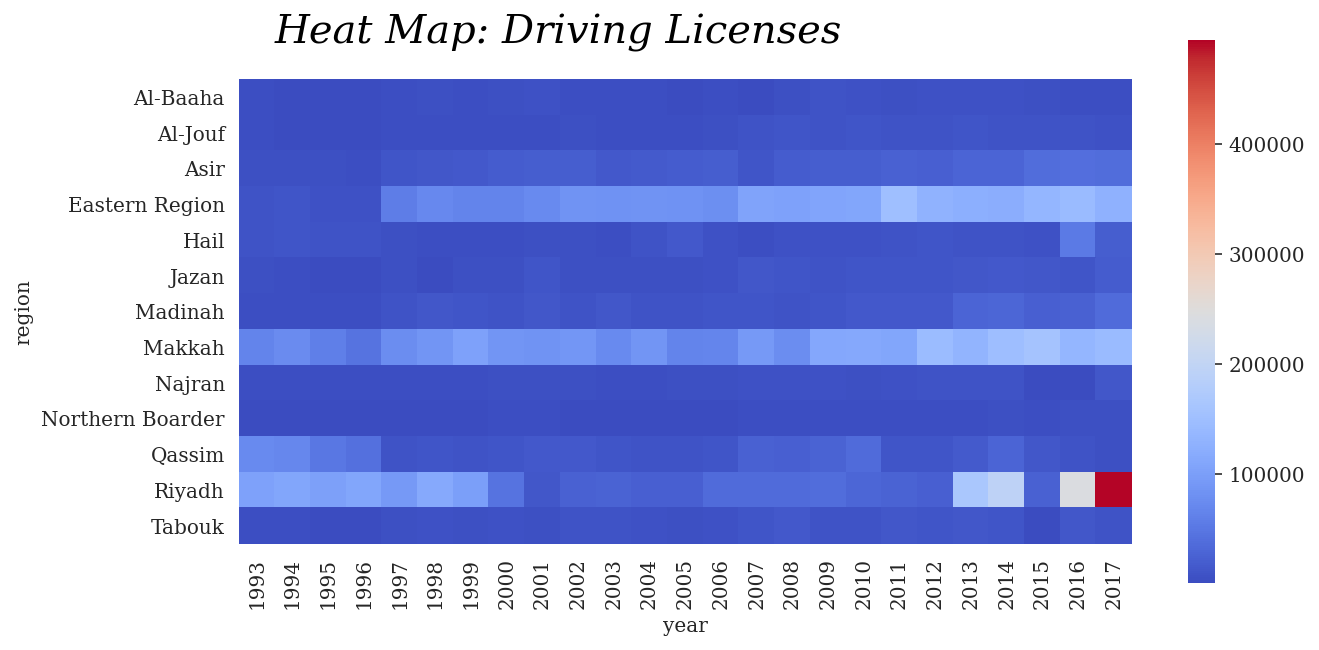

In [58]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "serif"
dr = driving_updated.pivot("region", "year","liceses_d")
midpoint = (dr.values.max() - dr.values.min()) / 2
p_dr=sns.heatmap(dr, cmap='coolwarm', center=midpoint,square=True)
plt.text(1,-1, "Heat Map: Driving Licenses", fontsize = 20, color='Black', fontstyle='italic')
p_dr.get_figure().savefig('../plots/heatmap/heatmap_driving Licenses.png')


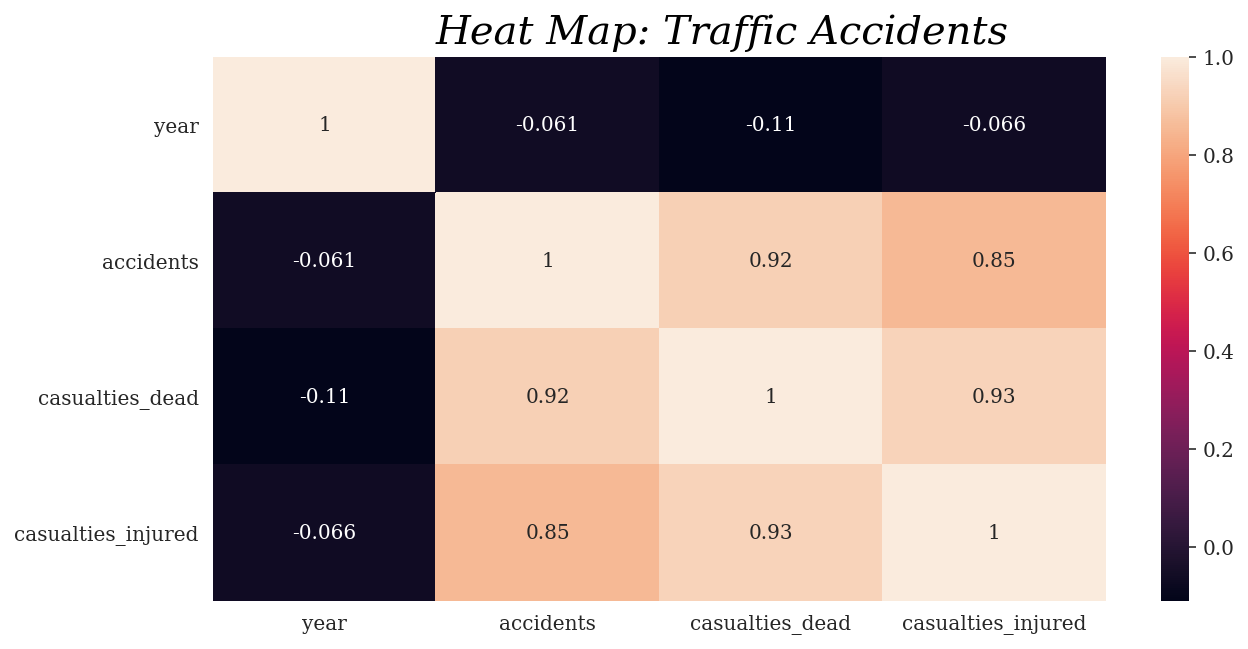

In [59]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "serif"
sns.heatmap(traffic_wide_flat.corr(),annot=True)
p_tr=plt.text(1,-0.1, "Heat Map: Traffic Accidents ", fontsize = 20, color='Black', fontstyle='italic')
p_tr.get_figure().savefig('../plots/heatmap/heatmap_traffic_accidents.png')

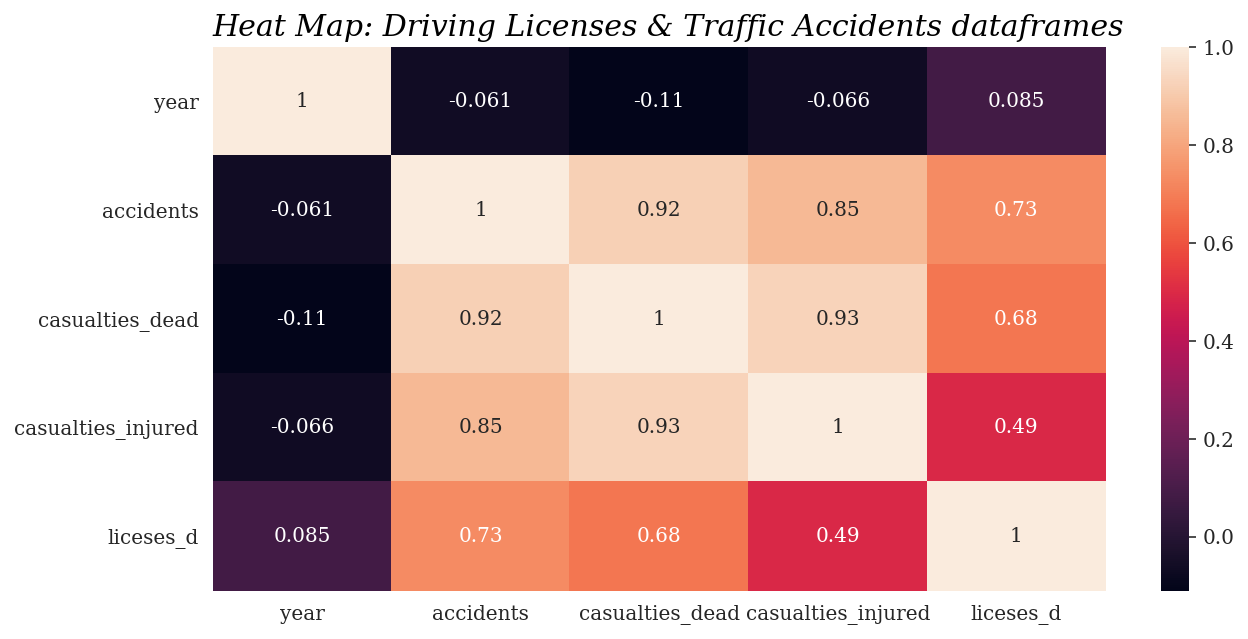

In [60]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "serif"
sns.heatmap(merge_df.corr(),annot=True)
p_dr_tr= plt.text(0,-0.1, "Heat Map: Driving Licenses & Traffic Accidents dataframes ", fontsize = 15, color='Black', fontstyle='italic')
p_dr_tr.get_figure().savefig('../plots/heatmap/heatmap_driving_licenses_and_traffic_accidents.png')

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [61]:
# subplot histograms
def subplot_histograms(dataframe):
    dataframe= dataframe.select_dtypes(exclude=['object']) # select just numeric columns.
    dataframe= dataframe.drop(['year'], axis=1) # drop year column becuse no point of plot year column.
    hist_name='' 
    # to get name for saving figure
    # test the name of the dataframe that assigned to the function through argument.
    if dataframe.equals(traffic_wide_flat.select_dtypes(exclude=['object']).drop(['year'], axis=1)):
        hist_name= 'traffic_accidents_casualties' 
    elif dataframe.equals(driving_updated.select_dtypes(exclude=['object']).drop(['year'], axis=1)):
        hist_name= 'driving_licenses'
    elif dataframe.equals(merge_df.select_dtypes(exclude=['object']).drop(['year'], axis=1)):
        hist_name= 'merged_dataframes'
        
    list_of_columns= dataframe.columns
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,tight_layout=True) # You'll want to specify your figsize
    fig.autofmt_xdate() # to avoid overlap 
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) #hist
        ax[i].set_title(dataframe[column].name, fontsize=18)
        ax[i].set_ylabel('Observations', fontsize=5)
        ax[i].set_xlabel('', fontsize=14)
        plt.tight_layout()
        if i == len(list_of_columns)-1:
            ax[i].get_figure().savefig('../plots/histogram/'+ hist_name +'_histogram.png') # save the figure using the name of dataframe.




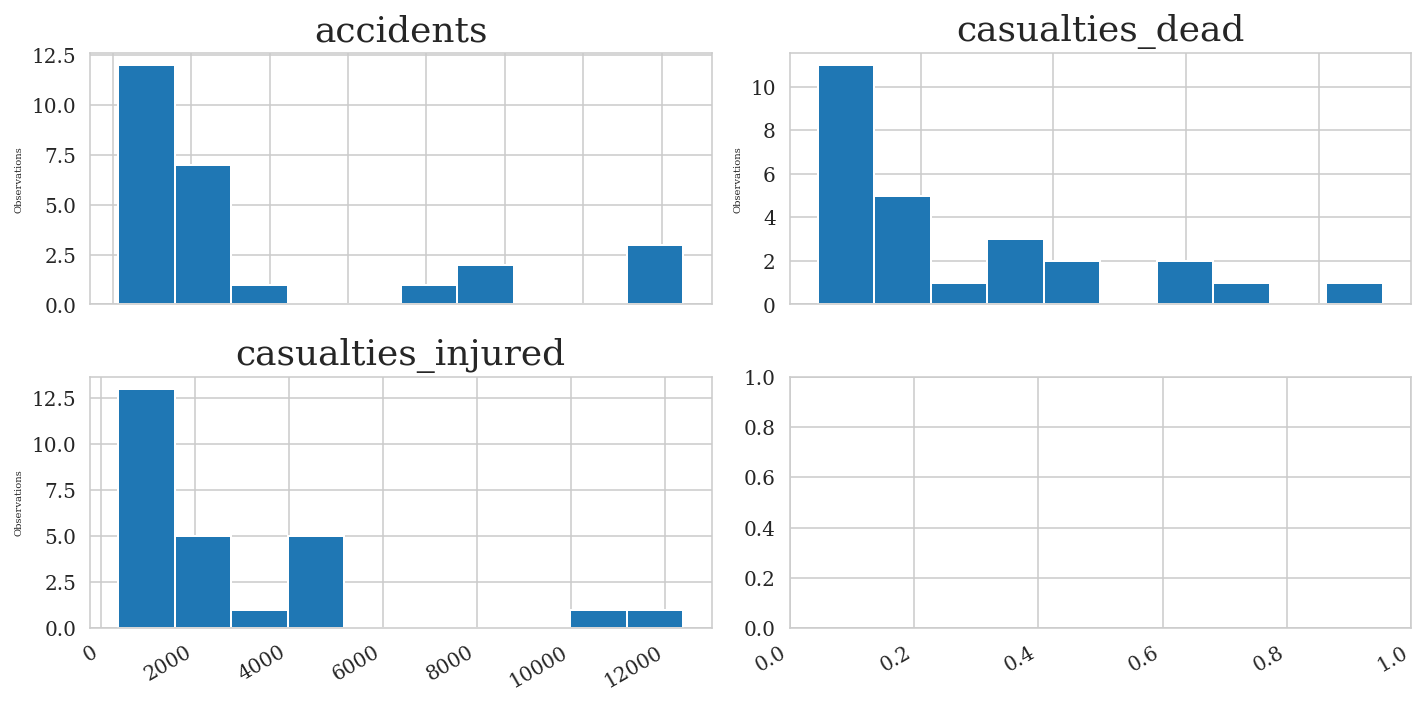

In [62]:
subplot_histograms(traffic_wide_flat)


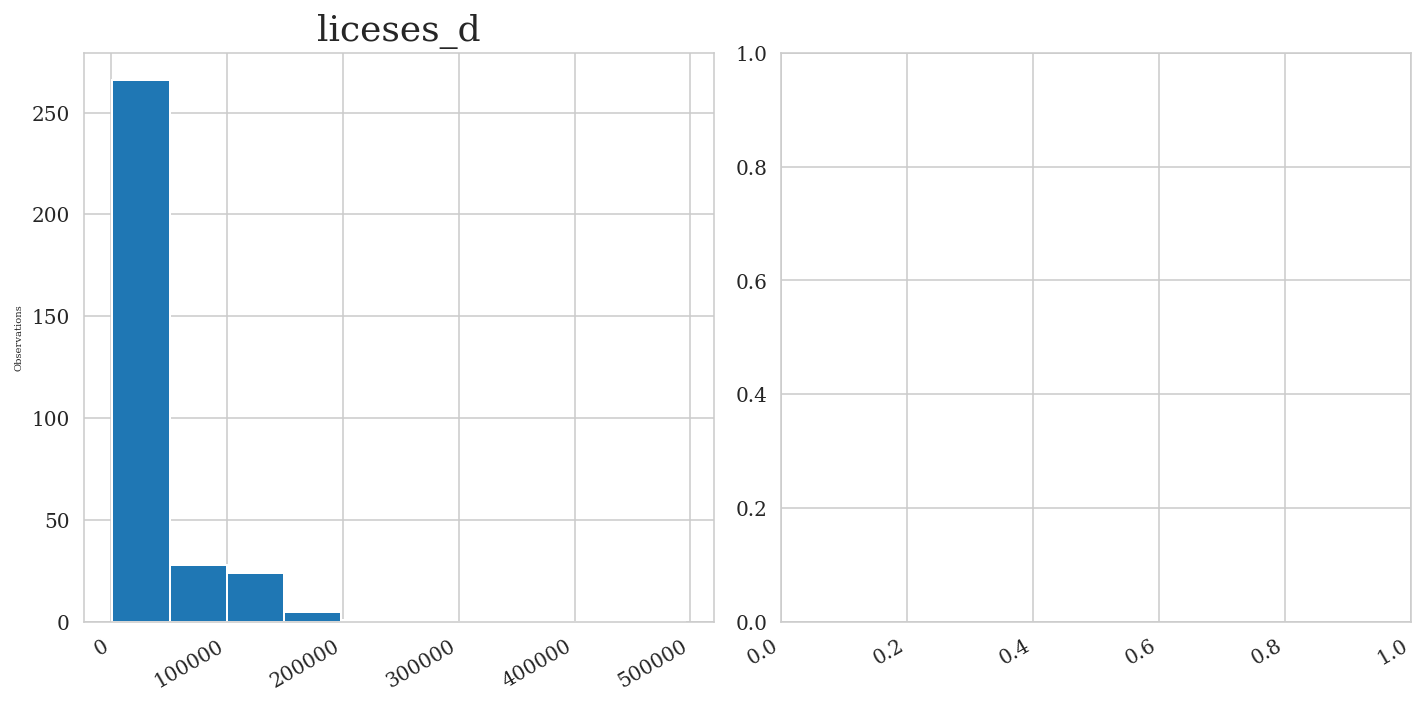

In [63]:
subplot_histograms(driving_updated)


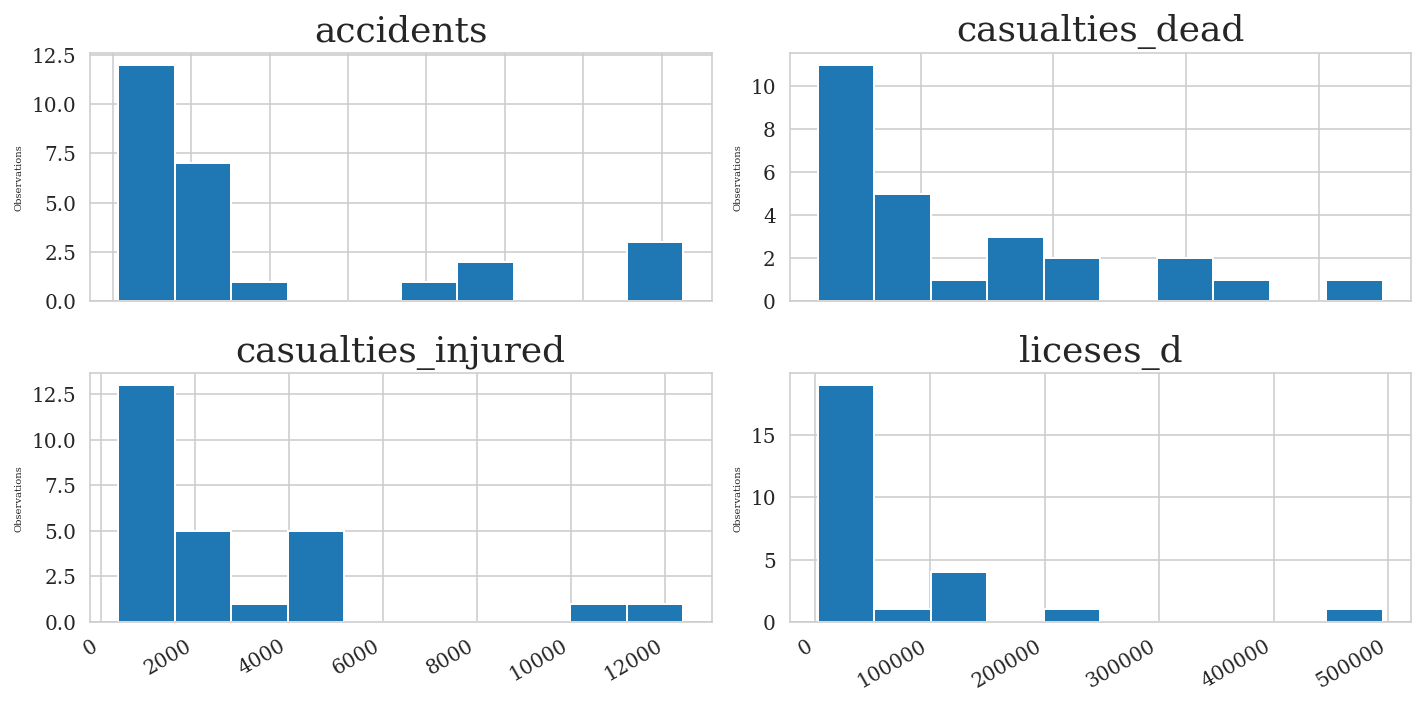

In [64]:
subplot_histograms(merge_df)

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

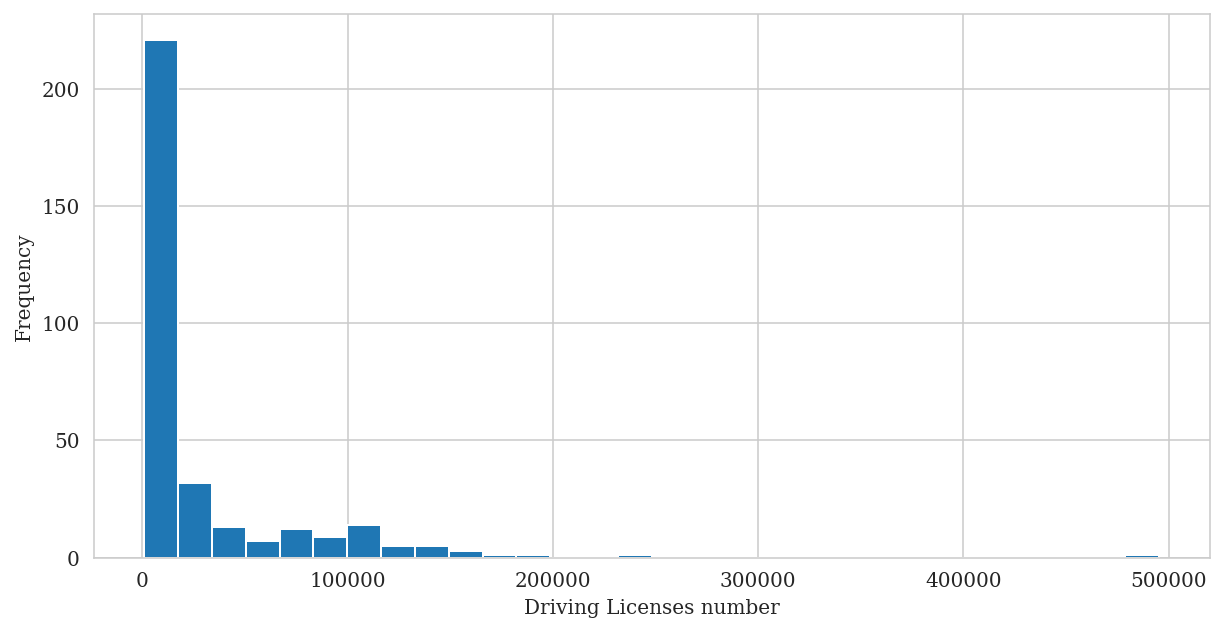

<Figure size 720x360 with 0 Axes>

In [65]:
# Code
plt.hist(driving_updated.liceses_d,bins=30)
plt.xlabel('Driving Licenses number')
plt.ylabel('Frequency')
plt.show()
plt.savefig('../plots/histogram/driving_licenses_number_histogram.png') # save the figure

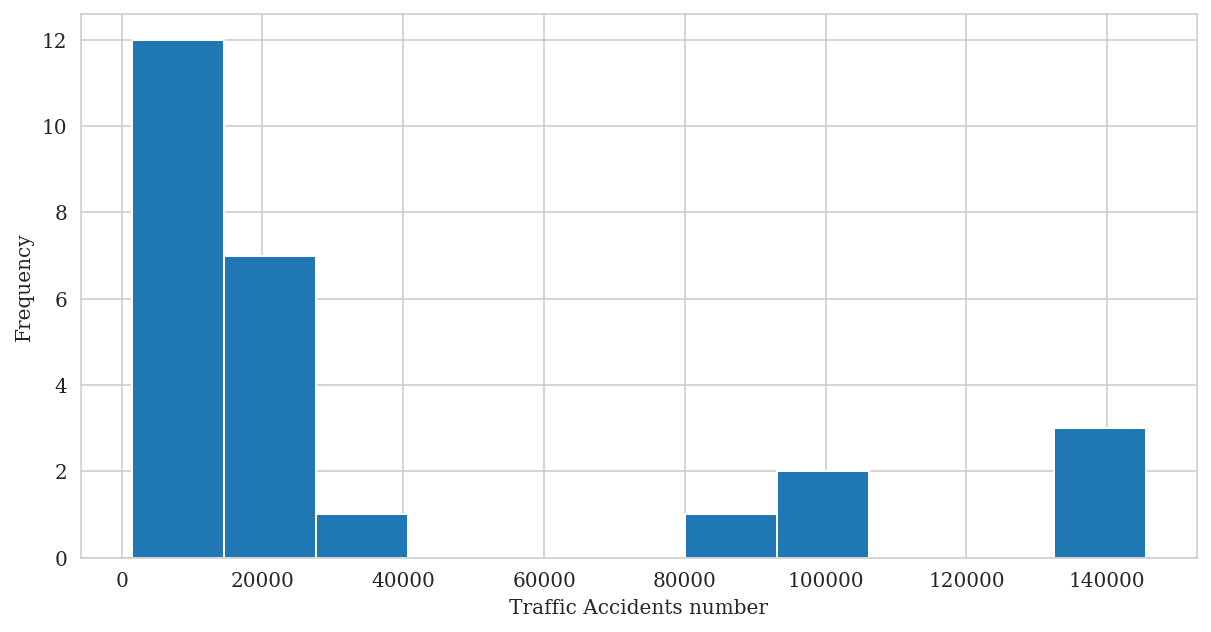

<Figure size 720x360 with 0 Axes>

In [66]:
binwidth=10
#plt.hist(traffic_wide_flat.accidents, bins=np.arange(min(traffic_wide_flat.accidents), max(traffic_wide_flat.accidents) + binwidth, binwidth))
plt.hist(traffic_wide_flat.accidents,bins='auto')
plt.xlabel('Traffic Accidents number')
plt.ylabel('Frequency')
plt.show()
plt.savefig('../plots/histogram/traffic_accidents_number_histogram.png') # save the figure

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [67]:
# Q1: Driving Licenses vs. Traffic Accidents for 2017.
# Q2: Driving Licenses vs. Traffic Accidents for 2016.
# Code for diffrent columns name.
# Let's color and remove outliers from the plot
def scatter_plots_cond(first_comp,second_comp,year,condition):
    
    
    merge_df_co= merge_df[merge_df[second_comp] < condition] # select all the data points which are not outliers.
    temp_first_df=  merge_df_co[merge_df_co.year== year][first_comp] # select x-axis for scatter plots  
    temp_second_df=  merge_df_co[merge_df_co.year== year][second_comp] # select y-axis for scatter plots
    
    outlirt= merge_df[merge_df[second_comp] > condition] # select all the data points which are outliers.
    outlirt_first_df= outlirt[outlirt.year== year][first_comp] # select x-axis for scatter plots
    outlirt_second_df= outlirt[outlirt.year== year][second_comp] # select y-axis for scatter plots
        
    # plot all the data points (outliers and not outliers) with different colors.
    plt.figure(0,figsize=(6, 4)) # create figure with a specific size.
    plt.scatter(temp_first_df,temp_second_df) # plot all the data points which are not outliers.
    plt.scatter(outlirt_first_df,outlirt_second_df) # plot all the data points which are outliers.
    plt.title("Driving Licenses vs. Traffic Accidents for "+ str(year)) # the title based on the arguments.
    plt.xlabel(str(first_comp)+' '+str(year)); # x-label name based on the arguments.
    plt.ylabel(str(second_comp)+' '+str(year)); # y-label name based on the arguments.
    plt.legend(labels=['Not Outlir','Outlir']) # identify legend to name different colors in the plot. 
    plt.savefig("../plots/scatter/driving_licenses_vs_traffic_accidents_"+ str(year)+"_scatter.png") # save the figure.
    
    # plot all the data points which are not outliers only.
    plt.figure(1,figsize=(6, 4)) # create figure with a specific size.
    plt.scatter(temp_first_df,temp_second_df) # plot.
    plt.title("Driving Licenses vs. Traffic Accidents for "+ str(year)+ "\n without outlir") # title based on the arguments. 
    plt.xlabel(str(first_comp)+' '+str(year)); # x-label name based on the arguments.
    plt.ylabel(str(second_comp)+' '+str(year)); # y-label name based on the arguments.
    
    # plot outliers only.
    plt.figure(2,figsize=(6, 4)) # create figure with a specific size.
    plt.scatter(outlirt_first_df,outlirt_second_df) # plot.
    plt.title("Driving Licenses vs. Traffic Accidents for " + str(year)+ "\n Outlir") # title based on the arguments. 
    plt.xlabel(str(first_comp)+' '+str(year)); # x-label name based on the arguments.
    plt.ylabel(str(second_comp)+' '+str(year)); # y-label name based on the arguments.
    plt.xticks([]) # to avoid overlap.



In [68]:
# Q3: Driving Licenses for 2016 vs 2017.
# Q4: Traffic Accidents for 2016 vs 2017.
# Code one column name 'liceses_d' or 'accidents'.
# Let's color and remove outliers from the plot
def scatter_plots_cond2(column,year1,year2,condition):
  
    merge_df_co= merge_df[merge_df[column] < condition]  # select all the data points which are not outliers.
    temp_first_df=  merge_df_co[merge_df_co.year== year1][column] # select x-axis for scatter plots
    temp_second_df=  merge_df_co[merge_df_co.year== year2][column] # select y-axis for scatter plots
    
    outlirt= merge_df[merge_df[column] > condition] # select all the data points which are outliers.
    outlirt_first_df= outlirt[outlirt.year== year1][column] # select x-axis for scatter plots.
    outlirt_second_df= outlirt[outlirt.year== year2][column] # select y-axis for scatter plots.
    
    # to get name for saving figure
    # test the name of column that assigned to the function through argument.
    if column == 'liceses_d':
        x= 'Driving Licenses for '
    elif column == 'accidents':
        x= 'Traffic Accidents for '
    elif column == 'casualties_injured':
        x= 'Casualties Injured for '
    elif column == 'casualties_dead':
        x= 'Casualties Dead for '
        
            
    # plot all the data points (outliers and not outliers) with different colors.
    plt.figure(0,figsize=(6, 4)) # create figure with a specific size.
    plt.scatter(temp_first_df,temp_second_df) # plot all the data points which are not outliers.
    plt.scatter(outlirt_first_df,outlirt_second_df) # plot all the data points which are outliers.
    plt.title(x + str(year1)+ ' vs ' + str(year2)) # the title based on the arguments.
    plt.xlabel(str(column)+' '+str(year1)); # x-label name based on the arguments.
    plt.ylabel(str(column)+' '+str(year2)); # y-label name based on the arguments.
    plt.legend(labels=['Not Outlir','Outlir']) # identify legend to name different colors in the plot.
    plt.savefig("../plots/scatter/"+ x + str(year1)+ ' vs ' + str(year2)+ "_scatter.png") # save the figure.
       
    
    # plot all the data points which are not outliers only.
    plt.figure(1,figsize=(6, 4)) # create figure with a specific size.
    plt.scatter(temp_first_df,temp_second_df) # plot.
    plt.title(x + str(year1)+ ' vs ' + str(year2)+ "\n without outlir") # title based on the arguments. 
    plt.xlabel(str(column)+' '+str(year1)); # x-label name based on the arguments.
    plt.ylabel(str(column)+' '+str(year2)); # y-label name based on the arguments.
    
    # plot outliers only.
    plt.figure(2,figsize=(6, 4)) # create figure with a specific size.
    plt.scatter(outlirt_first_df,outlirt_second_df) # plot.
    plt.title(x + str(year1)+ ' vs ' + str(year2)+ "\n Outlir") # title based on the arguments.
    plt.xlabel(str(column)+' '+str(year1)); # x-label name based on the arguments.
    plt.ylabel(str(column)+' '+str(year2)); # y-label name based on the arguments.
    plt.xticks([]) # to avoid overlap. 
    
   



In [69]:
# Q1: Driving Licenses vs. Traffic Accidents for 2017
merge_df[merge_df.year== 2017]['accidents'] # this line will return the number of accidents in 2017 for each region.
# the high number of accidents are outliers.
# The outliers are greater than 80000.
# The high number of accidents related to Mikkah, Riyadh, Eastern Region. 

13      1414
14     10469
15     25245
16     81433
17      9379
18     22161
19     16070
20    145541
21      3193
22     11540
23     22405
24     99925
25     11713
Name: accidents, dtype: int64

In [70]:
# Q1: Continue.
# Driving Licenses vs. Traffic Accidents for 2017
merge_df[merge_df.year== 2017][merge_df.accidents>80000]  # The outliers are greater than 80000.

<ipython-input-70-79d04a8e5c95>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_df[merge_df.year== 2017][merge_df.accidents>80000]  # The outliers are greater than 80000.


,year,region,geo_point,x,y,accidents,casualties_dead,casualties_injured,liceses_d
16,2017,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,81433,963,4073,126816
20,2017,Makkah,"21.628962766, 41.2636898334",21.628962766,41.2636898334,145541,1641,10623,142487
24,2017,Riyadh,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766,99925,1399,4540,495307


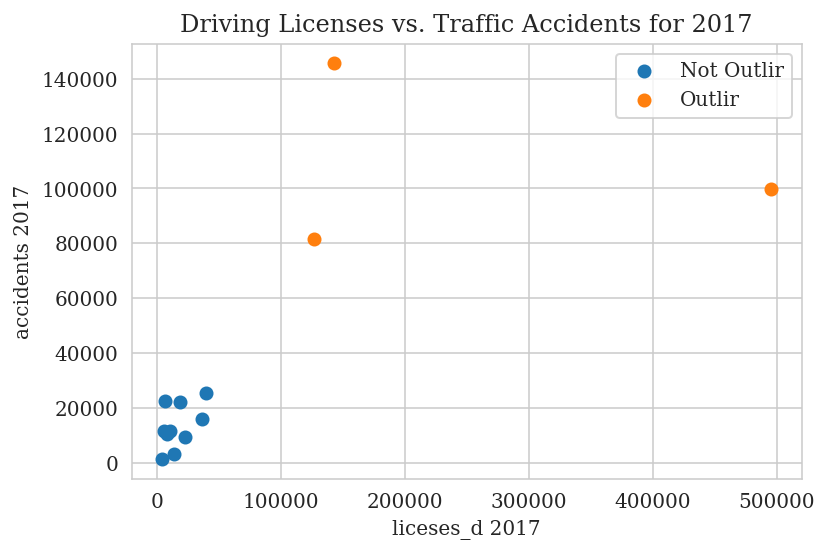

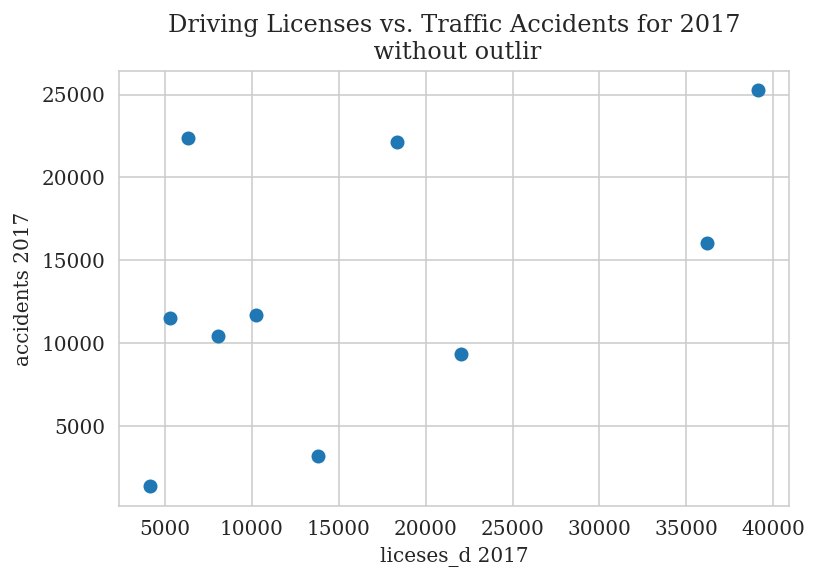

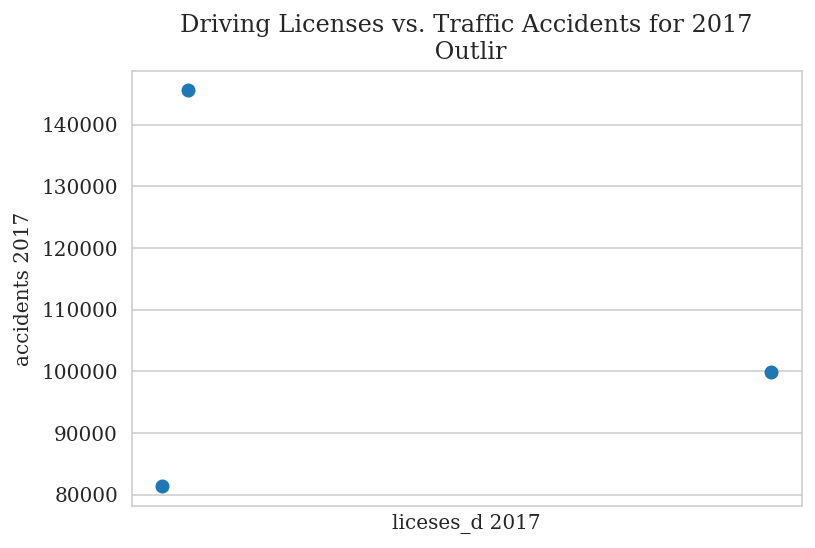

In [71]:
# Q1: Continue.
# Driving Licenses vs. Traffic Accidents for 2017
# call the function with arguments to plot: Driving Licenses vs. Traffic Accidents for 2017
scatter_plots_cond('liceses_d','accidents',2017,80000) 

In [72]:
# Q2: Driving Licenses vs. Traffic Accidents for 2016.
merge_df[merge_df.year== 2016]['accidents'] # this line will return the number of accidents in 2016 for each region.
# the high number of accidents are outliers.
# The outliers are greater than 100000.
# The high number of accidents related to Mikkah, Riyadh, Eastern Region.

0       3618
1      10212
2      32684
3     101619
4      10199
5      25873
6      14475
7     134838
8       3235
9      13196
10     25664
11    141736
12     16031
Name: accidents, dtype: int64

In [73]:
# Q2: Continue.
# Driving Licenses vs. Traffic Accidents for 2016.
merge_df[merge_df.year== 2016][merge_df.accidents>100000]  # The outliers are greater than 100000.

<ipython-input-73-e20b719badb2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_df[merge_df.year== 2016][merge_df.accidents>100000]  # The outliers are greater than 100000.


,year,region,geo_point,x,y,accidents,casualties_dead,casualties_injured,liceses_d
3,2016,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,101619,1113,4893,142307
7,2016,Makkah,"21.628962766, 41.2636898334",21.628962766,41.2636898334,134838,2243,12383,136055
11,2016,Riyadh,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766,141736,1430,4207,242851


In [74]:
# Q2: Continue.
# Driving Licenses vs. Traffic Accidents for 2016.
merge_df[merge_df.year== 2016][merge_df.liceses_d>100000] # The outliers are greater than 100000.

<ipython-input-74-c96f7a8ff293>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_df[merge_df.year== 2016][merge_df.liceses_d>100000] # The outliers are greater than 100000.


,year,region,geo_point,x,y,accidents,casualties_dead,casualties_injured,liceses_d
3,2016,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,101619,1113,4893,142307
7,2016,Makkah,"21.628962766, 41.2636898334",21.628962766,41.2636898334,134838,2243,12383,136055
11,2016,Riyadh,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766,141736,1430,4207,242851


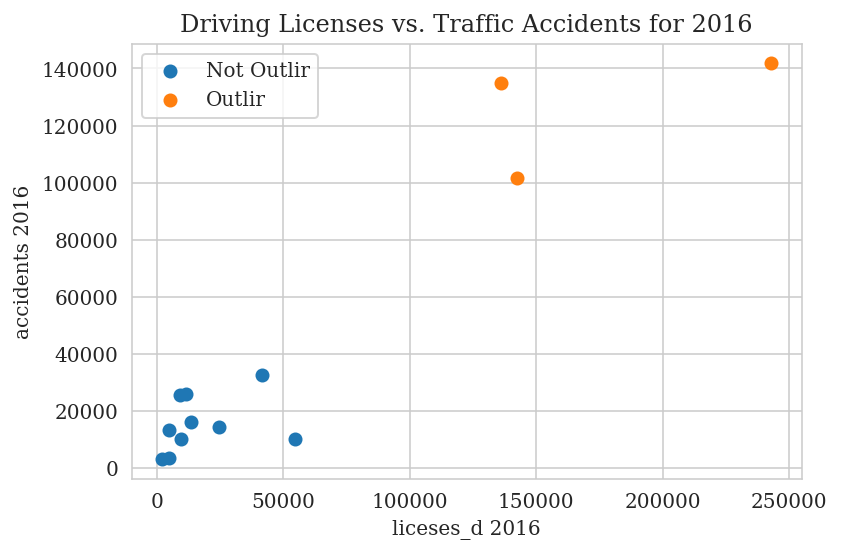

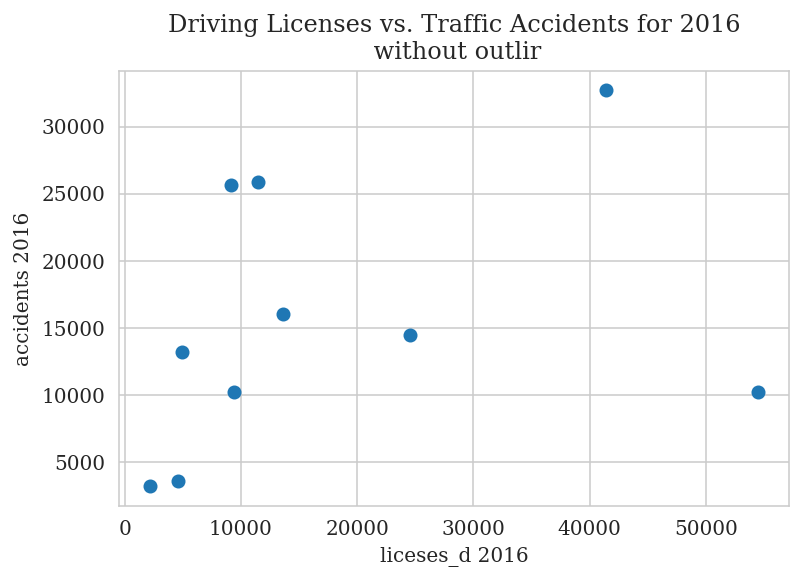

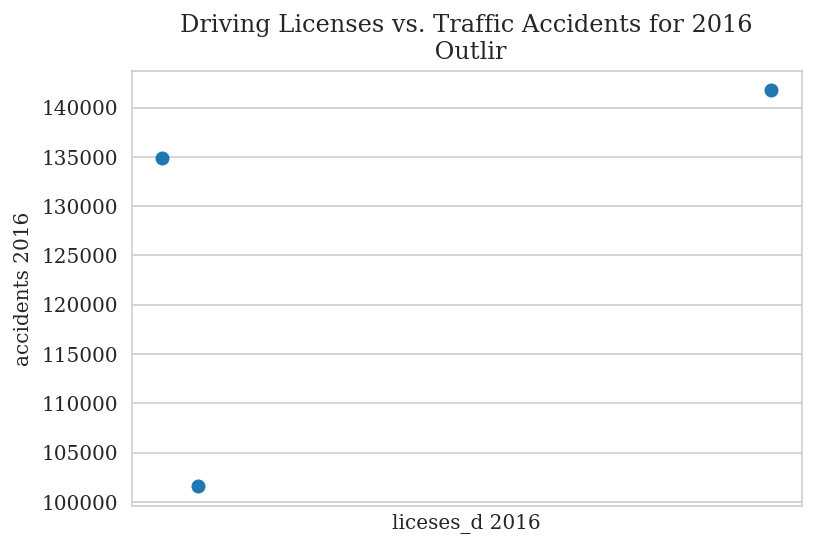

In [75]:
# Q2: Continue.
# Driving Licenses vs. Traffic Accidents for 2016.
# Call the function with arguments to plot: Driving Licenses vs. Traffic Accidents for 2016.
scatter_plots_cond('liceses_d','accidents',2016,100000) 

In [76]:
# Q3: Driving Licenses for 2016 vs 2017.
merge_df[merge_df.year== 2016]['liceses_d'] # this line will return the number of driving licenses in 2016 for each region.
# the high number of driving licenses are outliers.
# The outliers are greater than 100000.
# The high number of driving licenses related to Mikkah, Riyadh, Eastern Region.

0       4614
1       9371
2      41367
3     142307
4      54507
5      11504
6      24540
7     136055
8       2153
9       4958
10      9180
11    242851
12     13610
Name: liceses_d, dtype: int64

In [77]:
# Q3: Continue.
# Driving Licenses for 2016 vs 2017.
merge_df[merge_df.year== 2016][merge_df.liceses_d>100000]  # The outliers are greater than 100000.

<ipython-input-77-ea50b13f936a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_df[merge_df.year== 2016][merge_df.liceses_d>100000]  # The outliers are greater than 100000.


,year,region,geo_point,x,y,accidents,casualties_dead,casualties_injured,liceses_d
3,2016,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,101619,1113,4893,142307
7,2016,Makkah,"21.628962766, 41.2636898334",21.628962766,41.2636898334,134838,2243,12383,136055
11,2016,Riyadh,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766,141736,1430,4207,242851


In [78]:
# Q3: Continue.
# Driving Licenses for 2016 vs 2017.
merge_df[merge_df.year== 2017][merge_df.liceses_d>100000] # The outliers are greater than 100000.

<ipython-input-78-c4d2c49b4eb1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_df[merge_df.year== 2017][merge_df.liceses_d>100000] # The outliers are greater than 100000.


,year,region,geo_point,x,y,accidents,casualties_dead,casualties_injured,liceses_d
16,2017,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,81433,963,4073,126816
20,2017,Makkah,"21.628962766, 41.2636898334",21.628962766,41.2636898334,145541,1641,10623,142487
24,2017,Riyadh,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766,99925,1399,4540,495307


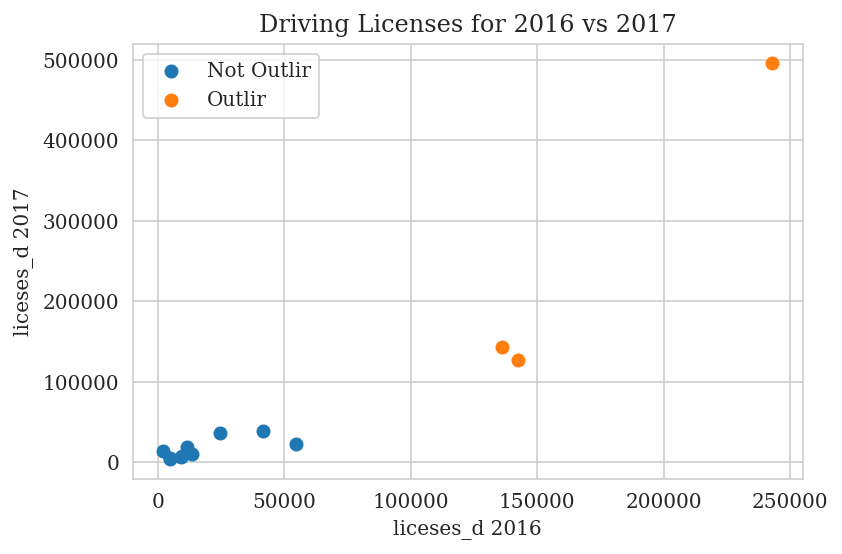

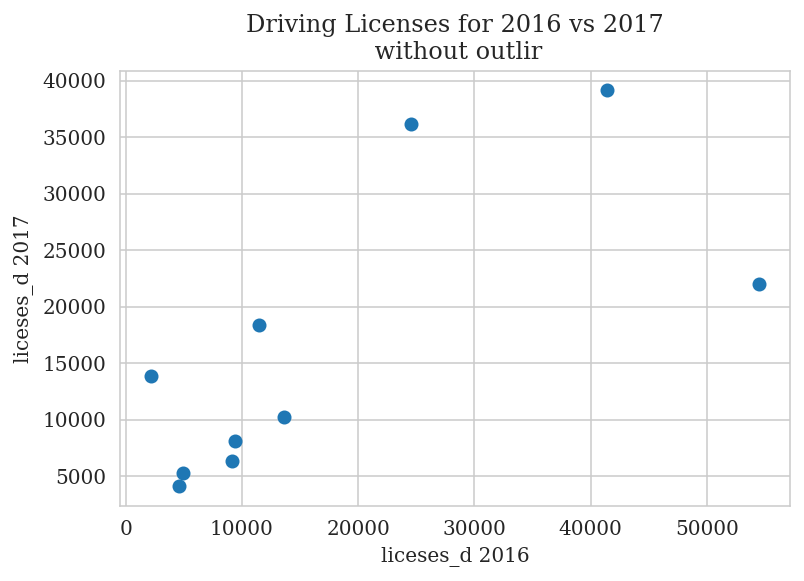

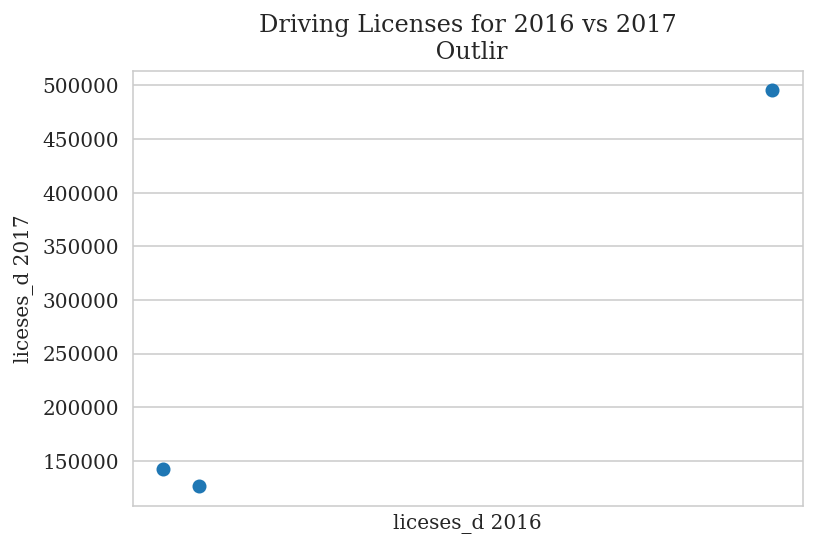

In [79]:
# Q3: Continue.
# Driving Licenses for 2016 vs 2017.
# Call the function with arguments to plot: Driving Licenses for 2016 vs 2017.
scatter_plots_cond2('liceses_d',2016,2017,100000)

In [80]:
# Q4: Traffic Accidents for 2016 vs 2017.
merge_df[merge_df.year== 2016]['accidents'] # this line will return the number of accidents in 2016 for each region.
# the high number of accidents are outliers.
# The outliers are greater than 100000.
# The high number of accidents related to Mikkah, Riyadh, Eastern Region.

0       3618
1      10212
2      32684
3     101619
4      10199
5      25873
6      14475
7     134838
8       3235
9      13196
10     25664
11    141736
12     16031
Name: accidents, dtype: int64

In [81]:
# Q4: Continue.
# Traffic Accidents for 2016 vs 2017.
merge_df[merge_df.year== 2016][merge_df.accidents>80000]  # The outliers are greater than 80000.

<ipython-input-81-ef3575f74108>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_df[merge_df.year== 2016][merge_df.accidents>80000]  # The outliers are greater than 80000.


,year,region,geo_point,x,y,accidents,casualties_dead,casualties_injured,liceses_d
3,2016,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,101619,1113,4893,142307
7,2016,Makkah,"21.628962766, 41.2636898334",21.628962766,41.2636898334,134838,2243,12383,136055
11,2016,Riyadh,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766,141736,1430,4207,242851


In [82]:
# Q4: Continue.
# Traffic Accidents for 2016 vs 2017.
merge_df[merge_df.year== 2017][merge_df.accidents>80000]  # The outliers are greater than 80000.

<ipython-input-82-d9683a71cb8f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_df[merge_df.year== 2017][merge_df.accidents>80000]  # The outliers are greater than 80000.


,year,region,geo_point,x,y,accidents,casualties_dead,casualties_injured,liceses_d
16,2017,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,81433,963,4073,126816
20,2017,Makkah,"21.628962766, 41.2636898334",21.628962766,41.2636898334,145541,1641,10623,142487
24,2017,Riyadh,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766,99925,1399,4540,495307


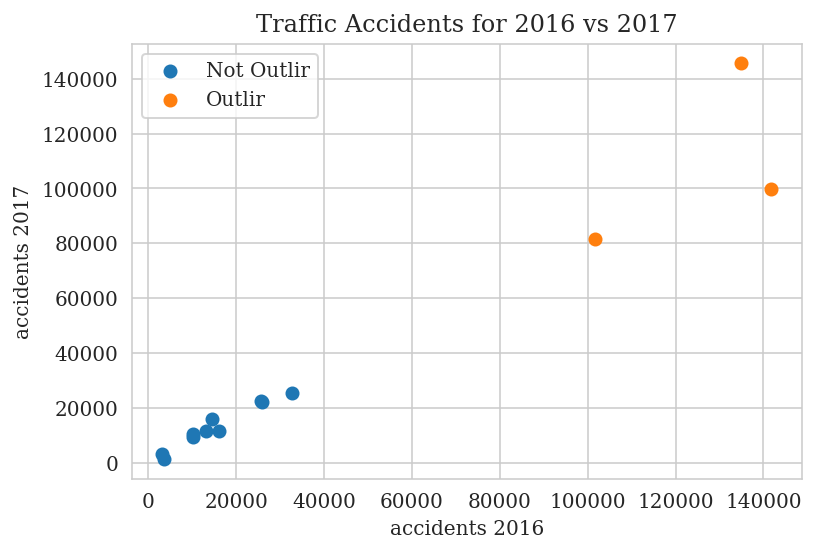

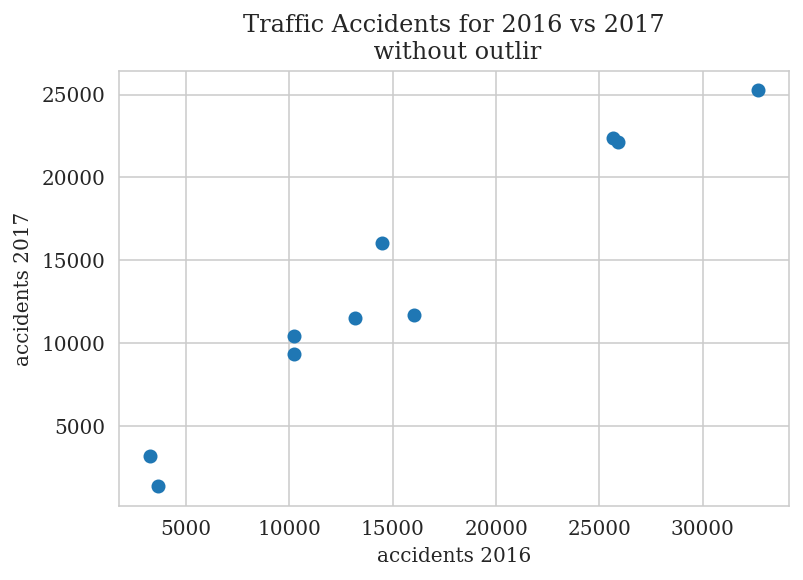

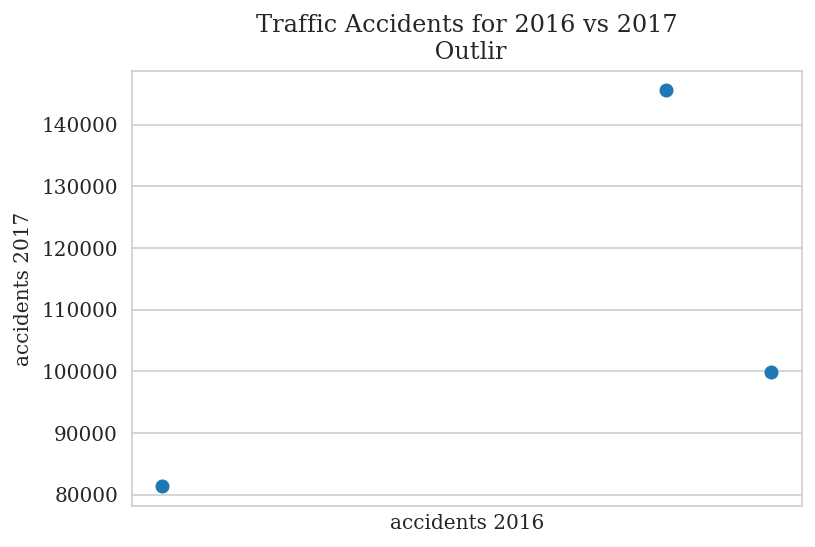

In [83]:
# Q4: Continue.
# Traffic Accidents for 2016 vs 2017.
# Call the function with arguments to plot: Traffic Accidents for 2016 vs 2017.
scatter_plots_cond2('accidents',2016,2017,80000)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [84]:
# function to have similar min/max values
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

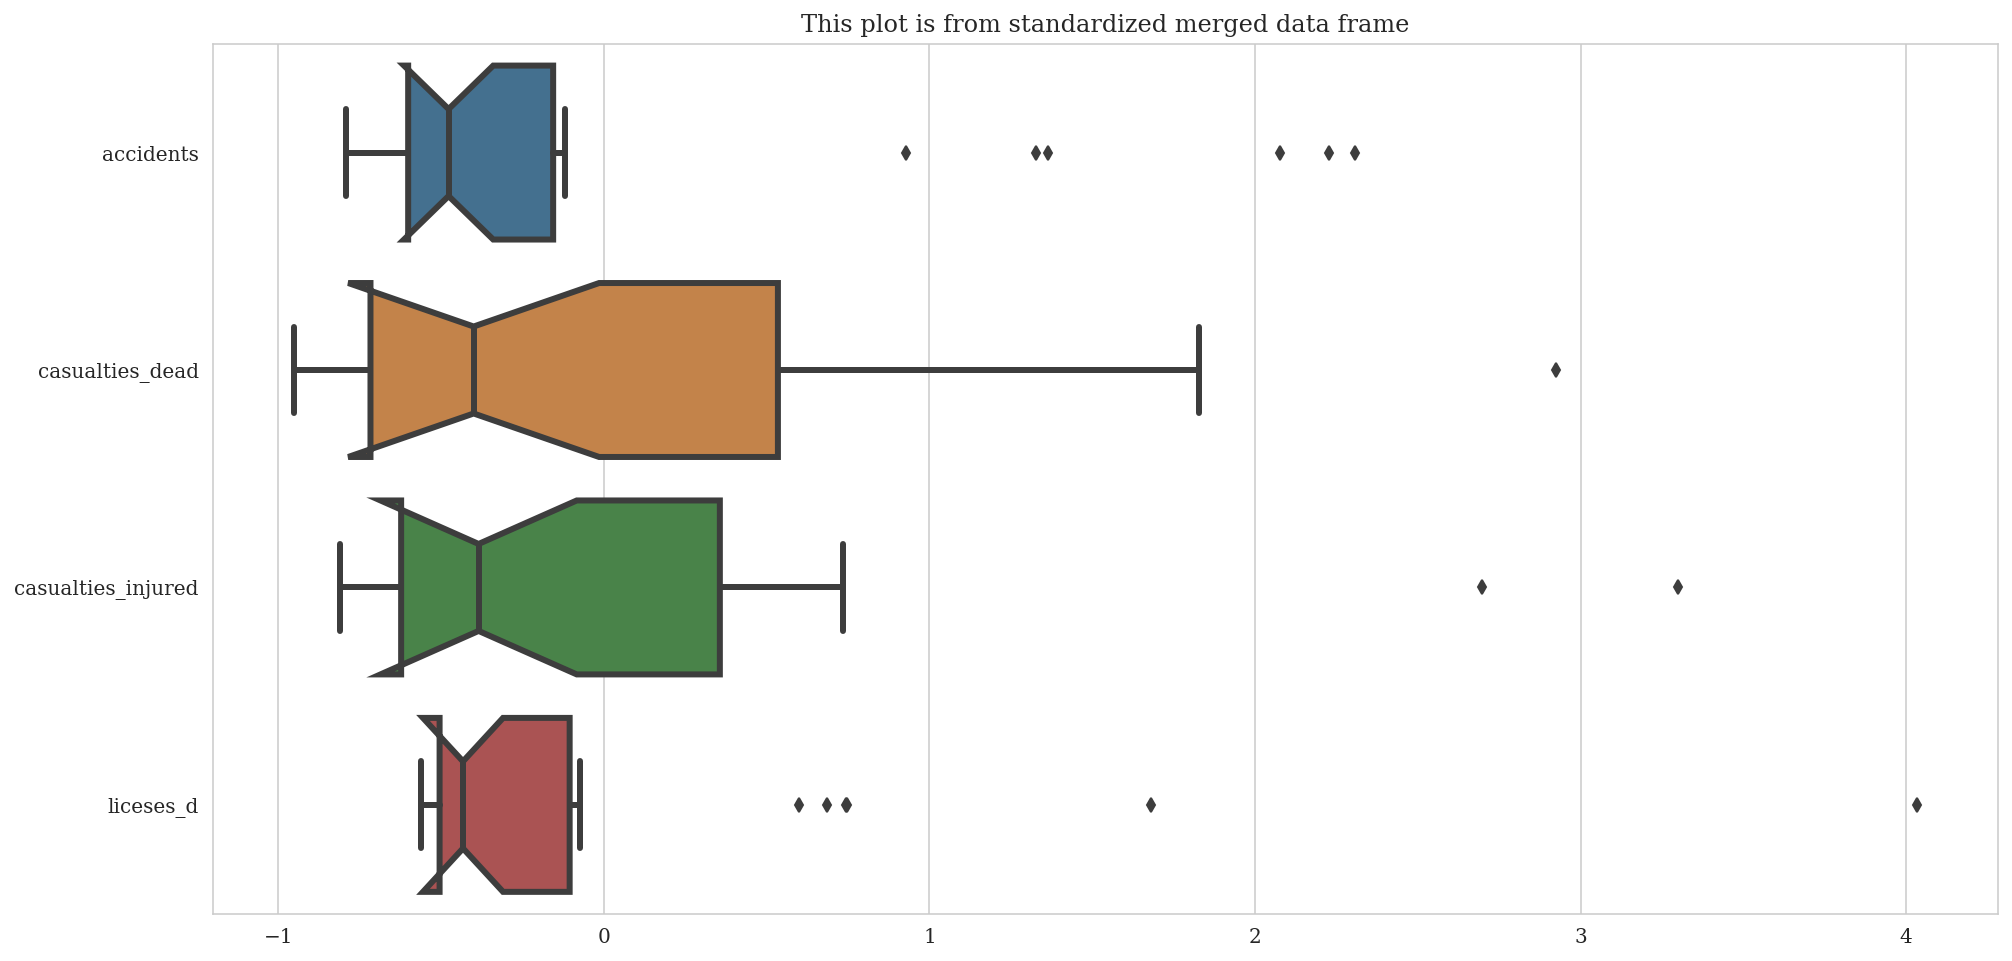

In [85]:
# Code
# this is going to be our standardized dataframe 
merge_df_stand = var_standardized(
    merge_df.select_dtypes(exclude=['object']).drop(['year'], axis=1)) # only numeric columns and drop year. 

fig,ax=plt.subplots(figsize=(16,8)) # create figure with specific size  
sns.boxplot(data=merge_df_stand, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax) # plot 
plt.title('This plot is from standardized merged data frame'); # title.
plt.savefig("../plots/boxplots/boxplot_merged_dataframe.png") # save the figure.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

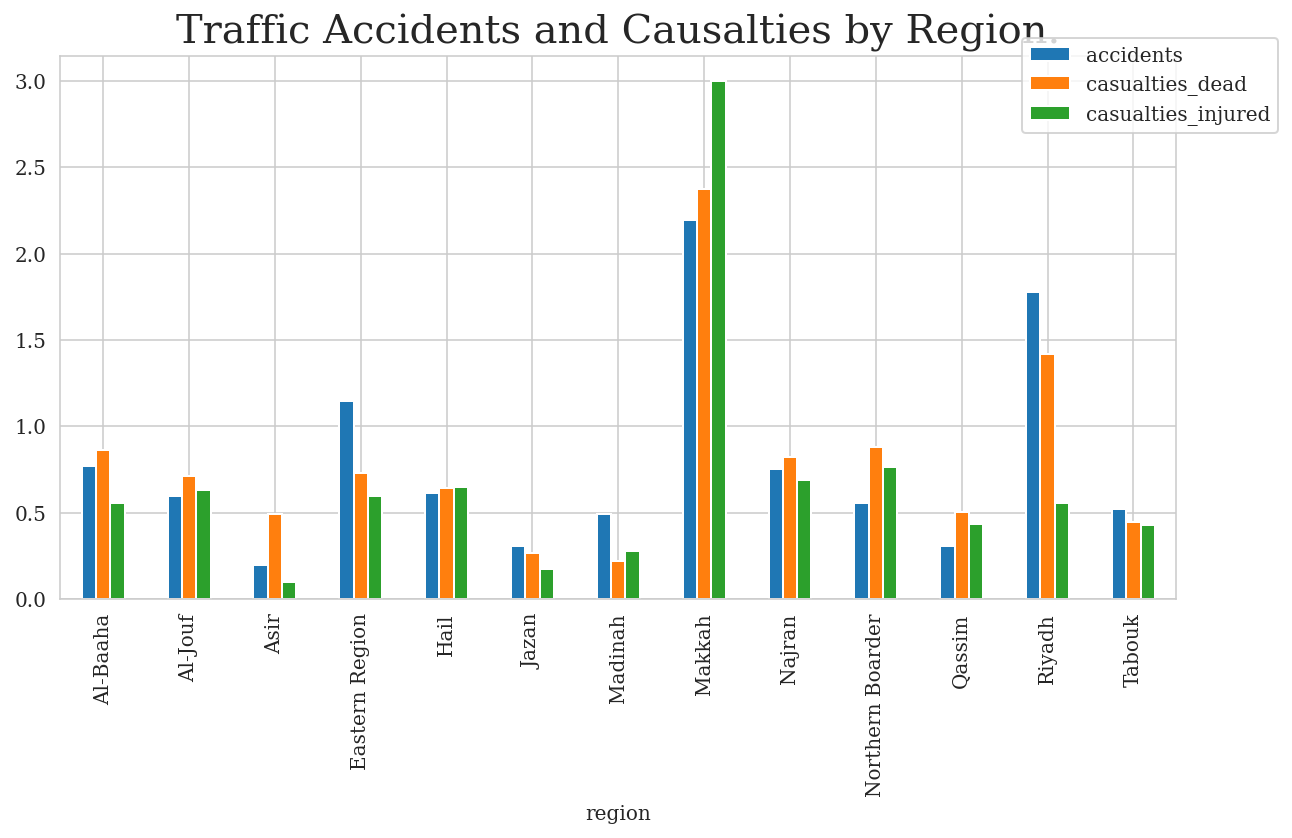

In [86]:
merge_df_up= merge_df.copy() # copy dataframe

# standardize specific columns to have clear plot.  
merge_df_up['casualties_injured']= var_standardized(merge_df_up['casualties_injured']).abs()
merge_df_up['casualties_dead']=  var_standardized(merge_df_up['casualties_dead']).abs()
merge_df_up['accidents']= var_standardized(merge_df_up['accidents']).abs()

# drop licenses and year columns because I want to plot only traffic Accidents and Causalties by Region
ax2 = merge_df_up.drop('liceses_d', axis=1).drop('year',axis=1).groupby('region').mean().plot(kind='bar')
ax2.legend(loc=3) # move legend to have clear plot. 
ax2.legend(bbox_to_anchor=(1.1, 1.05))
ax2.set_title('Traffic Accidents and Causalties by Region.',fontsize=20); # title.
plt.savefig("../plots/additional plots/traffic_accidents_and_causalties_by_region.png") # save the figure.

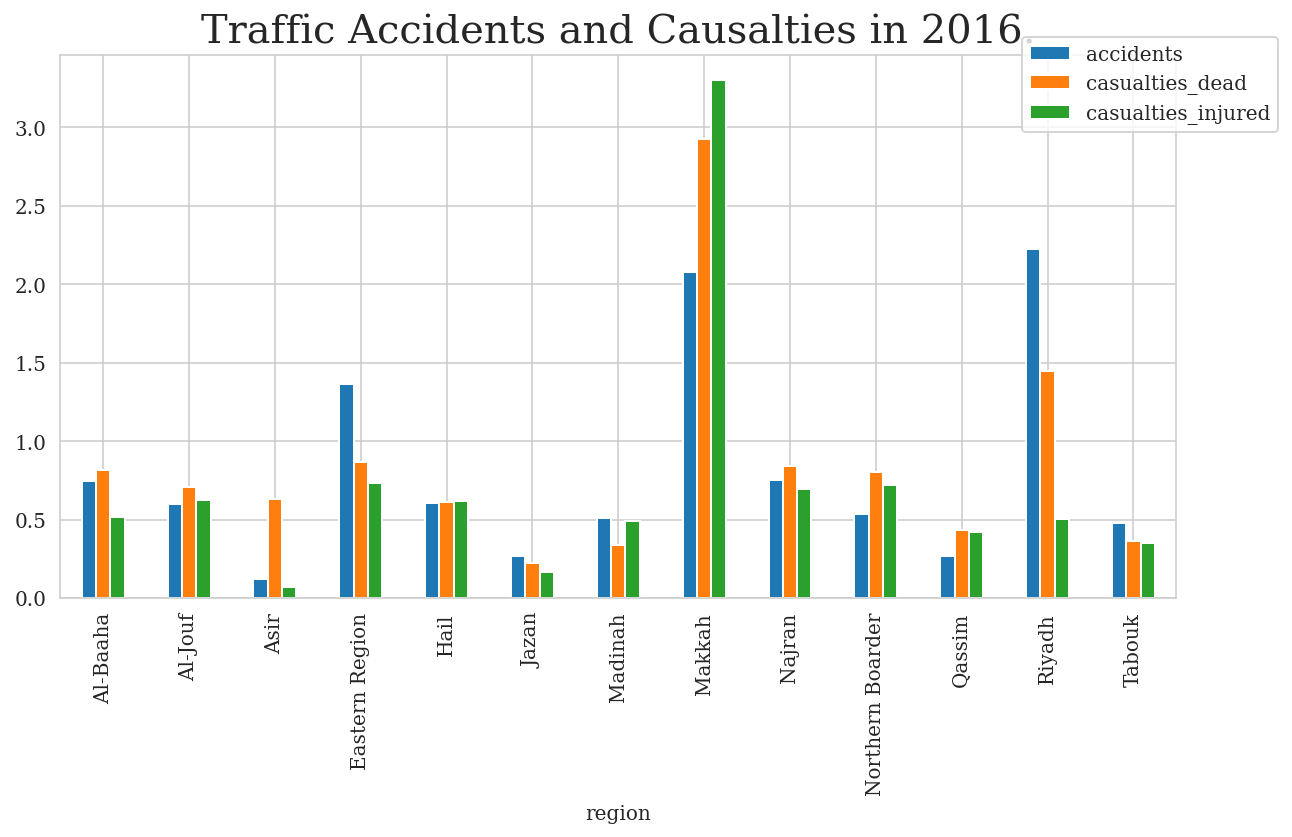

In [87]:
#ax2_std= var_standardized(merge_df.select_dtypes(exclude=['object']).drop('liceses_d', axis=1).drop('year',axis=1))
merge_df_up= merge_df.copy() # copy dataframe

# standardize specific columns to have clear plot.  
merge_df_up['casualties_injured']= var_standardized(merge_df_up['casualties_injured']).abs()
merge_df_up['casualties_dead']=  var_standardized(merge_df_up['casualties_dead']).abs()
merge_df_up['accidents']= var_standardized(merge_df_up['accidents']).abs()

# drop licenses and year columns because I want to plot only traffic Accidents and Causalties in 2016.
ax2 =merge_df_up[merge_df_up.year==2016].drop('liceses_d', axis=1).drop('year',axis=1).groupby('region').mean().plot.bar()
ax2.legend(loc=3) # move legend to have clear plot. 
ax2.legend(bbox_to_anchor=(1.1, 1.05))
ax2.set_title('Traffic Accidents and Causalties in 2016.',fontsize=20); # title.
plt.savefig("../plots/additional plots/traffic_accidents_and_causalties_2016.png") # save the figure.

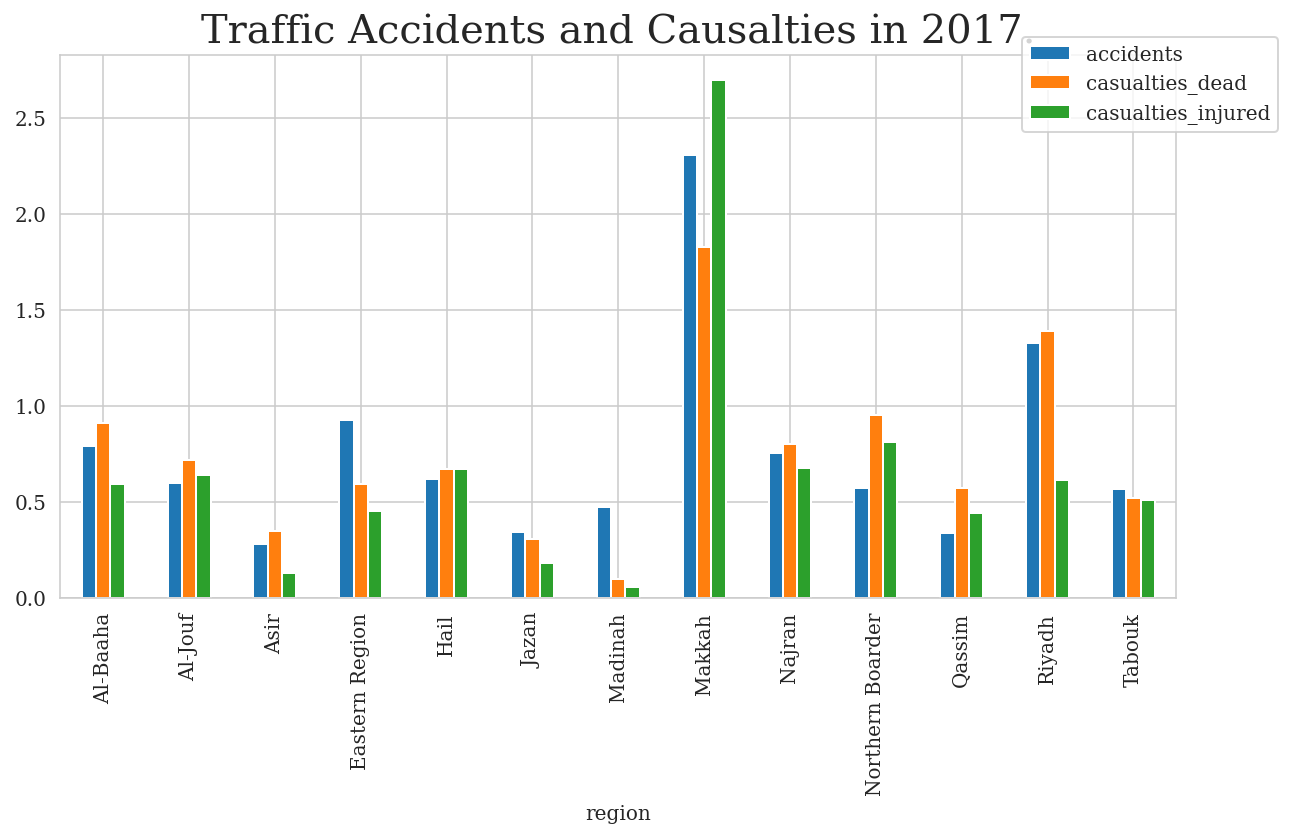

In [88]:
# drop licenses and year columns because I want to plot only traffic Accidents and Causalties in 2017.
ax2 =merge_df_up[merge_df_up.year==2017].drop('liceses_d', axis=1).drop('year',axis=1).groupby('region').mean().plot.bar()
ax2.legend(loc=3) # move legend to have clear plot. 
ax2.legend(bbox_to_anchor=(1.1, 1.05))
ax2.set_title('Traffic Accidents and Causalties in 2017.',fontsize=20)
plt.savefig("../plots/additional plots/traffic_accidents_and_causalties_2017.png") # save the figure.

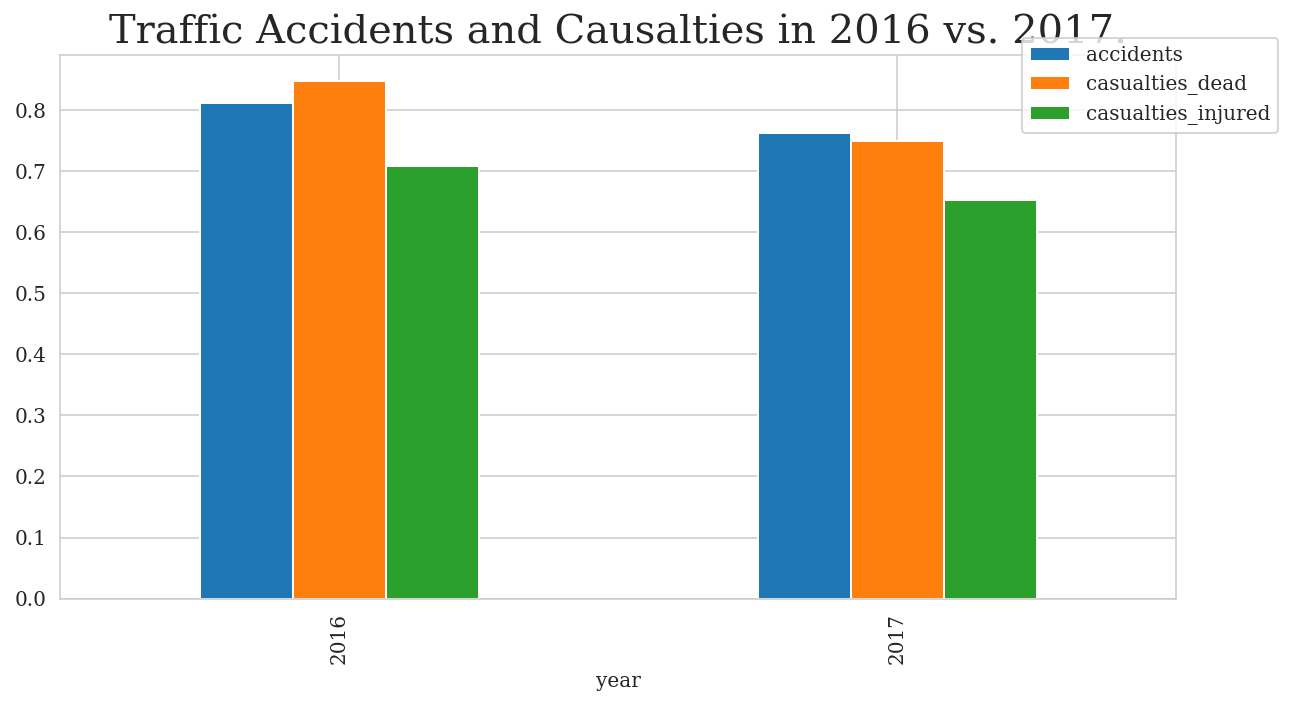

In [89]:
# drop licenses and year columns because I want to plot only traffic Accidents and Causalties in 2016 vs 2017.
ax2 =merge_df_up.drop('liceses_d', axis=1).groupby('year').mean().plot.bar()
ax2.legend(loc=3) # move legend to have clear plot. 
ax2.legend(bbox_to_anchor=(1.1, 1.05))
ax2.set_title('Traffic Accidents and Causalties in 2016 vs. 2017.',fontsize=20)
plt.savefig("../plots/additional plots/traffic_accidents_and_causalties_2016_vs_2017.png") # save the figure.

**Comment and findings:**

From the previous plots, Makkah has the highest number of accidents, injured, and dead. In addition to Makkah, Riyadh and Eastern Region have high numbers. In contrast, ten regions out of Saudi Arabia regions have similar numbers. Therefore, plotting the datafram shows outliers, which have high numbers of accidents, injuries, and death. In this case, removing the outliers is not appropriate because the outliers need further investigation and research to understand the reasons. The outliers should be identified to avoid any effect on the model's performance to fit a Machine Learning model.

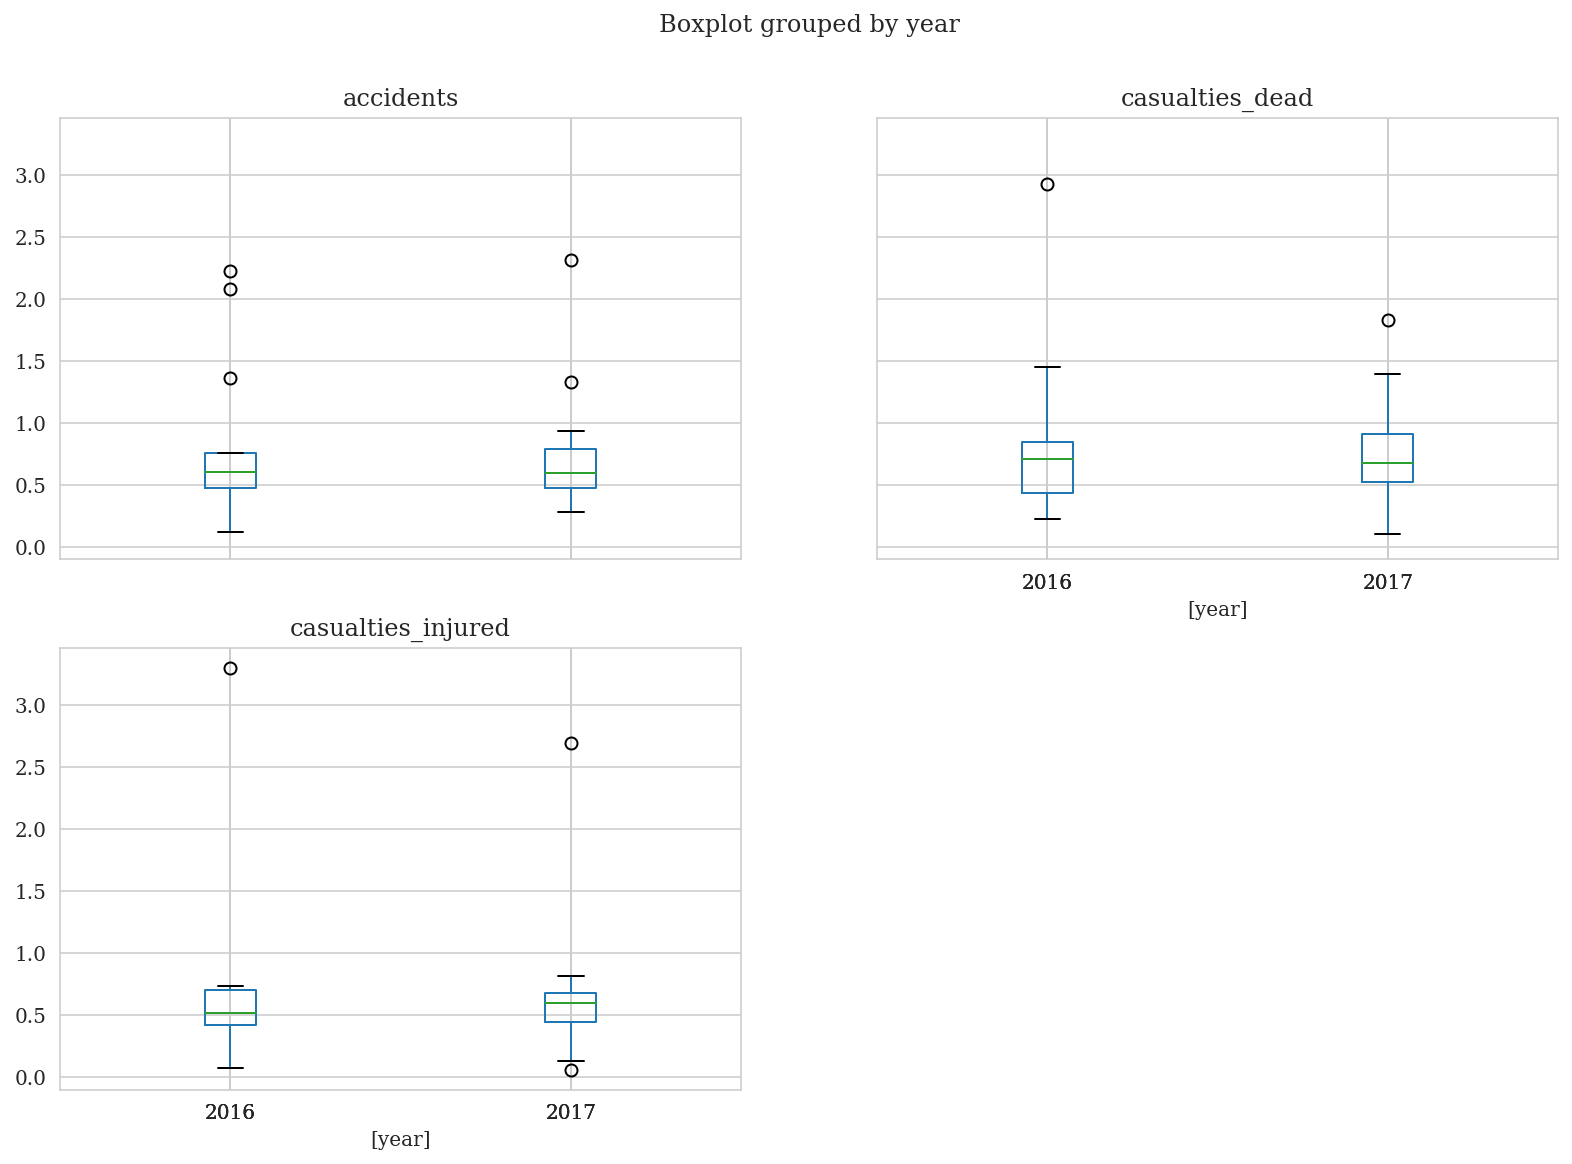

In [90]:
# plot traffic accidents and causalties by year
merge_df_up.drop('liceses_d', axis=1).boxplot(by= 'year',figsize=(13,9), vert=True);
plt.savefig("../plots/additional plots/traffic_accidents_and_causalties_by_year.png") # save the figure.

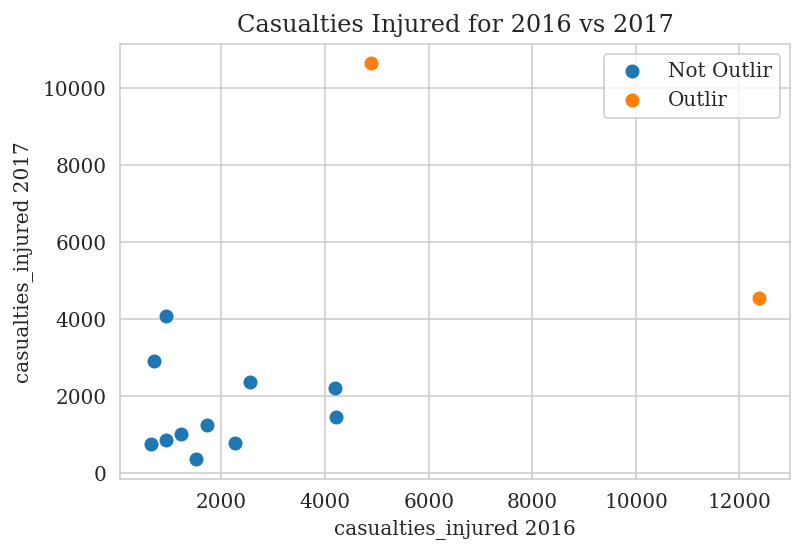

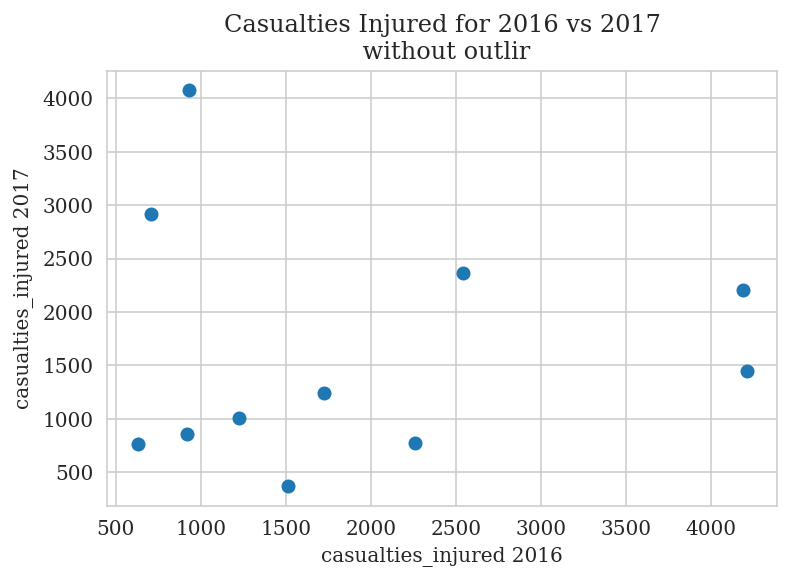

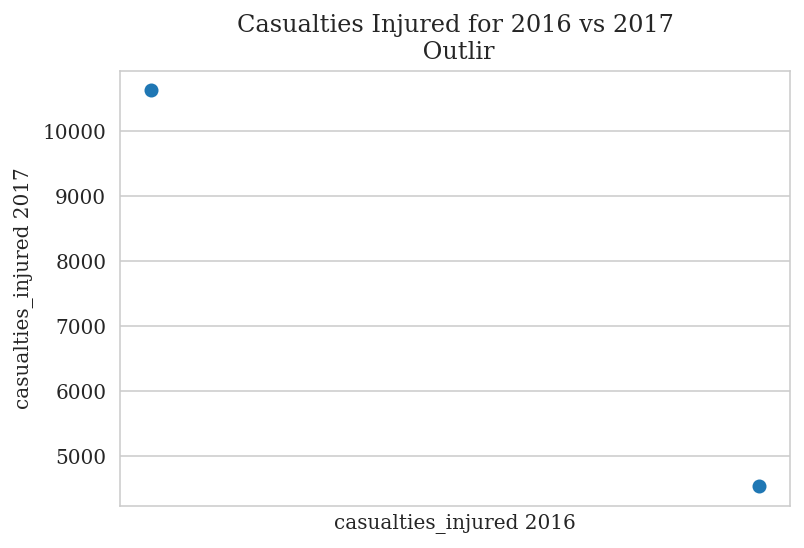

In [91]:
# plot casualties injured in 2016 vs. 2017.
scatter_plots_cond2('casualties_injured',2016,2017,4500)
plt.savefig("../plots/additional plots/casualties_injured_2016_vs_2017.png") # save the figure.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

**Answers:** 

All the numeric columns/variables in the merged data frame are positive skewness. Pandas (describe) generates descriptive statistics such as mean, mode and median, which are called central tendency measures. The comparison between these measures indicates the skewness for each distribution. Moreover, the Skewtest function from (scipy.stats) library calculates the skewness of values. The medians are closer to the box's bottom from visualizing the numeric variables using boxplots in the previous questions. Consequently, all the distributions are positively skewed. Finally, manually comparing the measures gives the same positive skewness results for all the numeric columns.


The outliers are easily found by observing the difference at the minimum/maximum end of the range. For example, all the columns have at least one outlier at the maximum end. Moreover, using the (1.5 IQR) rule detects the outliers for each numeric column. The 1.5 IQR rule finds the lower and upper bound, where the outliers located outside these boundaries.



In [92]:
merge_df.drop('year', axis=1).describe()

,accidents,casualties_dead,casualties_injured,liceses_d
count,26.000000,26.000000,26.000000,26.000000
mean,38225.692308,635.384615,2743.038462,62507.000000
std,46493.705035,549.783381,2922.641127,107293.917762
min,1414.000000,112.000000,374.000000,2153.000000
25%,10276.250000,241.250000,923.000000,8363.250000
50%,16050.500000,415.500000,1618.500000,16085.000000
75%,30981.250000,929.250000,3784.000000,51222.000000
max,145541.000000,2243.000000,12383.000000,495307.000000


In [93]:
# Using Skewtest function from (scipy.stats) library:
from scipy.stats import skew # import the function.
# select numeric columns without year column.
num_colu= merge_df.select_dtypes(include=[np.number]).drop('year', axis=1)
print('Each variable in the merged dataframe:\n')
# apply skew function for each numeric column. 
for i in num_colu:
    if skew(merge_df[i]) > 0: # positive if the value > 0 
        print(i.capitalize()+':\n(Positive Skewness): more weight in the left tail of the distribution.\n')
    elif skew(merge_df[i]) < 0: # negative if the value < 0
        print(i+' Negative Skewness: more weight in the right tail of the distribution.')
    else: # if the value = 0, normally distributed
        print(i+' normally distributed.')

Each variable in the merged dataframe:

Accidents:
(Positive Skewness): more weight in the left tail of the distribution.

Casualties_dead:
(Positive Skewness): more weight in the left tail of the distribution.

Casualties_injured:
(Positive Skewness): more weight in the left tail of the distribution.

Liceses_d:
(Positive Skewness): more weight in the left tail of the distribution.



In [94]:

# manually comparing the measures
import statistics 
print('Each variable in the merged dataframe:\n')
for i in num_colu:  # for each numeric column, compare the measures
    if merge_df[i].mean() > statistics.median(merge_df[i]): # if mean > median check mode next check.
        if statistics.median(merge_df[i]) > statistics.mode(merge_df[i]): # if median > mode, positive as result, mean > median > mode 
            print(i.capitalize()+':\n(Positive Skewness): more weight in the left tail of the distribution.\n')
    elif merge_df[i].mean() < statistics.median(merge_df[i]): # if mean < median check mode next check.
        if statistics.median(merge_df[i]) < statistics.mode(merge_df[i]): # if median < mode, negative as result, mean < median < mode
            print(i.capitalize()+':\n(Negative Skewness): more weight in the right tail of the distribution.\n')
    else:
        print(i+' normally distributed.')
         

Each variable in the merged dataframe:

Accidents:
(Positive Skewness): more weight in the left tail of the distribution.

Casualties_dead:
(Positive Skewness): more weight in the left tail of the distribution.

Casualties_injured:
(Positive Skewness): more weight in the left tail of the distribution.

Liceses_d:
(Positive Skewness): more weight in the left tail of the distribution.



In [95]:
# calculate interquartile range:
lower_range={} # create dict to save lower_range for each column
upper_range={} # create dict to save lower_range for each column
for i in num_colu: # for each column.
    # Calculate Q1(first Quarter- 25) and Q3(third Quartile- 75)
    q75, q25 = np.percentile(merge_df[i], [75 ,25]) 
    iqr = q75 - q25 # Calculate IQR = (Q3 - Q1).
    lower_range[i] = q25 -(1.5 * iqr) # lower range for a column
    upper_range[i] = q75 + (1.5 * iqr) # upper range for a column

lower_range,upper_range # can be used to find the outliers as shown in next line.


({'accidents': -20781.25,
  'casualties_dead': -790.75,
  'casualties_injured': -3368.5,
  'liceses_d': -55924.875},
 {'accidents': 62038.75,
  'casualties_dead': 1961.25,
  'casualties_injured': 8075.5,
  'liceses_d': 115510.125})

In [96]:
# find the outliers for 'accidents' column.
merge_df[(merge_df.accidents < lower_range['accidents']) | (merge_df.accidents > upper_range['accidents'])]

,year,region,geo_point,x,y,accidents,casualties_dead,casualties_injured,liceses_d
3,2016,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,101619,1113,4893,142307
7,2016,Makkah,"21.628962766, 41.2636898334",21.628962766,41.2636898334,134838,2243,12383,136055
11,2016,Riyadh,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766,141736,1430,4207,242851
16,2017,Eastern Region,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,81433,963,4073,126816
20,2017,Makkah,"21.628962766, 41.2636898334",21.628962766,41.2636898334,145541,1641,10623,142487
24,2017,Riyadh,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766,99925,1399,4540,495307


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

**Answers:** 

For the merged data frame, it can not be possible because we only have 25 data points. More data points are needed to take enough size for each sample, at least 30 data points for the sample size.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answers:**

This assumption holds for the Traffic Accidents data frame because it has 26 data points. The sample size requires at least 30 data points. On the other hand, the Driving Licenses data set has 325 data points. The licenses column has 17 outliers after checking the (1.5 IQR ) rule, as shown in the next line. We can assume that the data we sample from the licenses column will be normally distributed.

In [97]:
driving_updated.info() 
print('\nskew value',skew(driving_updated.liceses_d))
q75, q25 = np.percentile(merge_df[i], [75 ,25]) 
iqr = q75 - q25 # Calculate IQR = (Q3 - Q1).
lower_range = q25 -(1.5 * iqr) # lower range for a column
upper_range = q75 + (1.5 * iqr)

print('\nThe outliers in  licenses column:')

driving_updated[(driving_updated.liceses_d < lower_range) | (driving_updated.liceses_d > upper_range)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 349
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       325 non-null    int64 
 1   region     325 non-null    object
 2   liceses_d  325 non-null    int64 
 3   geo_point  325 non-null    object
 4   x          325 non-null    object
 5   y          325 non-null    object
dtypes: int64(2), object(4)
memory usage: 17.8+ KB

skew value 4.157901976472064

The outliers in  licenses column:


,year,region,liceses_d,geo_point,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
16,2015,Eastern Region,135752,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
65,2013,Riyadh,165994,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766
68,2015,Makkah,157389,"21.628962766, 41.2636898334",21.628962766,41.2636898334
69,2013,Makkah,131108,"21.628962766, 41.2636898334",21.628962766,41.2636898334
72,2014,Makkah,149234,"21.628962766, 41.2636898334",21.628962766,41.2636898334
94,2017,Eastern Region,126816,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
95,2011,Eastern Region,151087,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
96,2012,Eastern Region,129971,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
155,2014,Riyadh,194208,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [98]:
# Code optional
# I did it above even though it is optional because I really enjoyed every detail of this project.
# I want to make it :)

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Answer:** 

Similar studies related to the Kingdom of Saudi Arabia (KSA) traffic, but Dahim has conducted exciting research. The author studied the relationship between vision 2030 and road traffic accidents (RTAs), road traffic injuries (RTIs), and road traffic fatalities (RTFs) in KSA. In the last 30 years until the end of 2016, the numbers of RTAs, RTIs, and RTFs are continuously increased. Even though traffic law enforcement was applied to reduce RTAs and FTAs, the numbers increased. Moreover, the first cause of death is traffic accidents in KSA. When some Saudi Vision 2030 programs applied at the end of 2016 and the beginning of 2017, these numbers start to decrease noteworthy. Vision 2030 aims to avoid enormous waste in energy such as fuel and electricity by increasing fuel prices and implementing VAT by 5%. Consequently, people reduce unnecessary trips and tend to drive differently, which decreases fuel consumption. In addition, public transport is used more than owning vehicles (Dahim, 2018). 

 
Rahman, Jamal, and Al-Ahmadi have conducted another exciting study. The authors examined the relationships between urban land use and vehicle crash patterns to improve crash predictions. Moreover, creating policy recommendations and guidance to avoid any occurrence of a crash. The attributes of the environment and land use have been considered in the study. Geographic information systems (GIS) are used to examine crash hotspots in Dammam. Neighbourhoods, facilities, and population densities were important factors to determine crash hotspots. For example, fatal and injury crashes occurred mostly in places near public facilities with low to medium population densities on high-speed limit highways located in residential neighbourhoods (Rahman, Jamal, and Al-Ahmadi, 2020).




**References:** 

- Dahim, M. A. (2018). Impact of vision 2030 on traffic safety in Saudi Arabia. International journal of pediatrics and adolescent medicine, 5(3), 103-109.


- Rahman, M. T., Jamal, A., & Al-Ahmadi, H. M. (2020). Examining Hotspots of Traffic Collisions and their Spatial Relationships with Land Use: A GIS-Based Geographically Weighted Regression Approach for Dammam, Saudi Arabia. ISPRS International Journal of Geo-Information, 9(9), 540.


## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

**Answer:**

Even though the outliers affect distribution and model performance, the outliers could have important patterns. For example, Makkah, Riyadh and the Eastern Region have the highest numbers of driving licences and traffic accidents. Visualizing and analyzing the data sets identified these important regions as outliers. Exploring and researching more details about the data set could avoid uncertainty and mistakes generated by an algorithm.

More information and features about the environment, population densities, neighbourhoods, and land use would better inform the investigations related to all regions since the authors in the research section used these data in the Eastern Region to predict crash hotspots. 



